해당 과제는 'Brightics Studio'로 시작하는 금융 빅데이터 분석 교재를 참고함

In [6]:
import pandas as pd 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/Corona19_Classification_data.csv',encoding='cp949')

In [8]:
#불필요 컬럼 제거

In [9]:
#df.drop(columns=['Unnamed: 0', '생년월일'], inplace=True)

In [11]:
#df.info() #성별, 연체여부는 object로

성별, '범주형' 변수로 데이터타입을 int > object로 변환 <br>

In [12]:
df['성별']  = df['성별'].astype(str)

해당 데이터로 분류 모델링을 수행하기 위해서는 JOIN_KEY 속성이 배제돼야함

In [13]:
df_m = df.drop(columns=['JOIN_KEY'])

성별 변수 1: 남성<br>
성별 변수 2: 여성

In [14]:
df_m['성별'].unique()

array(['1', '2'], dtype=object)

In [15]:
df_m['성별'].head()

0    1
1    1
2    1
3    1
4    2
Name: 성별, dtype: object

해당 성별 변수를 one-hot 인코딩을 함 <br>
따라서 남성인 경우 1컬럼에 1, 여성인 경우 1컬럼에 0

In [16]:
sex_onehot = pd.get_dummies(df_m['성별'])

성별 카테고리는 남성 or 여성 딱 2가지이므로 한열에 모든 정보가 담겨있음 <br>
해당 내용과 동일하게 남성은 0, 여성은 1로 표현하기 위해 마지막 항목만 남겨둠

In [17]:
df_m['성별'].head()

0    1
1    1
2    1
3    1
4    2
Name: 성별, dtype: object

 * 즉 남성인 경우 0, 여성인 경우 1

In [19]:
sex_onehot.drop(columns=['1'], inplace=True)

In [20]:
sex_onehot = sex_onehot.rename(columns={'2':'성별'})

In [21]:
df_m.drop(columns=['성별'], inplace = True)

In [22]:
df_m = pd.concat([df_m, sex_onehot], axis=1)

In [24]:
len(df_m)

977390

In [25]:
len(df_m.columns)

62

In [26]:
945081*68

64265508

## 1. EDA

In [27]:
#시각화 패키지 라이브러리
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Malgun Gothic' #한글깨짐현상방지
matplotlib.rcParams['axes.unicode_minus'] = False

In [28]:
df_m.columns

Index(['생년월일', '나이', '대출건수_5개월_1', '대출건수_5개월_3', '대출건수_5개월_5', '대출건수_5개월_6',
       '대출건수_5개월_8', '대출건수_5개월_17', '대출건수_5개월_21', '대출건수_5개월_98', '대출금액_5개월_1',
       '대출금액_5개월_3', '대출금액_5개월_5', '대출금액_5개월_6', '대출금액_5개월_8', '대출금액_5개월_17',
       '대출금액_5개월_21', '대출금액_5개월_98', '대출건수_5개월_0', '대출건수_5개월_100',
       '대출건수_5개월_150', '대출건수_5개월_170', '대출건수_5개월_200', '대출건수_5개월_210',
       '대출건수_5개월_220', '대출건수_5개월_230', '대출건수_5개월_240', '대출건수_5개월_245',
       '대출건수_5개월_250', '대출건수_5개월_270', '대출건수_5개월_271', '대출건수_5개월_290',
       '대출건수_5개월_500', '대출건수_5개월_510', '대출건수_5개월_590', '대출건수_5개월_700',
       '대출건수_5개월_710', '대출금액_5개월_0', '대출금액_5개월_100', '대출금액_5개월_150',
       '대출금액_5개월_170', '대출금액_5개월_200', '대출금액_5개월_210', '대출금액_5개월_220',
       '대출금액_5개월_230', '대출금액_5개월_240', '대출금액_5개월_245', '대출금액_5개월_250',
       '대출금액_5개월_270', '대출금액_5개월_271', '대출금액_5개월_290', '대출금액_5개월_500',
       '대출금액_5개월_510', '대출금액_5개월_590', '대출금액_5개월_700', '대출금액_5개월_710',
       '개설카드수5', '총대출금액', '총대출건수', '총대출상품수', '연체여부', '성별'],
 

In [29]:
#연체여부 종속변수는 int로 변환
df_m['연체여부'] = df_m['연체여부'].map({'0':0,"b'1'":1})

In [30]:
df_m['연체여부'].value_counts()

0    973941
1      3449
Name: 연체여부, dtype: int64

In [31]:
3449/(973941+3449)*100

0.3528785848023819

In [32]:
df_m['연체여부'].unique()

array([0, 1], dtype=int64)

Text(0.5, 1.0, '연체여부 \n (0:정상 || 1:채무불이행)')

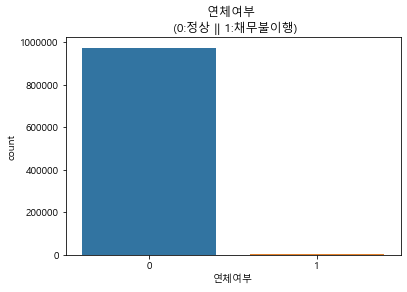

In [28]:
sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')

In [54]:
len(df_m.columns)

62

해당 상관관계를 파악해보면 동일 업권의 대출금액, 대출건수의 상관관계가 높음을 알 수 있고 <br>
그 외 다른 업권 즉 독립변수 간 뚜렷한 음,양의 상관관계를 갖는 변수는 없음

In [33]:
df_m.columns

Index(['생년월일', '나이', '대출건수_5개월_1', '대출건수_5개월_3', '대출건수_5개월_5', '대출건수_5개월_6',
       '대출건수_5개월_8', '대출건수_5개월_17', '대출건수_5개월_21', '대출건수_5개월_98', '대출금액_5개월_1',
       '대출금액_5개월_3', '대출금액_5개월_5', '대출금액_5개월_6', '대출금액_5개월_8', '대출금액_5개월_17',
       '대출금액_5개월_21', '대출금액_5개월_98', '대출건수_5개월_0', '대출건수_5개월_100',
       '대출건수_5개월_150', '대출건수_5개월_170', '대출건수_5개월_200', '대출건수_5개월_210',
       '대출건수_5개월_220', '대출건수_5개월_230', '대출건수_5개월_240', '대출건수_5개월_245',
       '대출건수_5개월_250', '대출건수_5개월_270', '대출건수_5개월_271', '대출건수_5개월_290',
       '대출건수_5개월_500', '대출건수_5개월_510', '대출건수_5개월_590', '대출건수_5개월_700',
       '대출건수_5개월_710', '대출금액_5개월_0', '대출금액_5개월_100', '대출금액_5개월_150',
       '대출금액_5개월_170', '대출금액_5개월_200', '대출금액_5개월_210', '대출금액_5개월_220',
       '대출금액_5개월_230', '대출금액_5개월_240', '대출금액_5개월_245', '대출금액_5개월_250',
       '대출금액_5개월_270', '대출금액_5개월_271', '대출금액_5개월_290', '대출금액_5개월_500',
       '대출금액_5개월_510', '대출금액_5개월_590', '대출금액_5개월_700', '대출금액_5개월_710',
       '개설카드수5', '총대출금액', '총대출건수', '총대출상품수', '연체여부', '성별'],
 

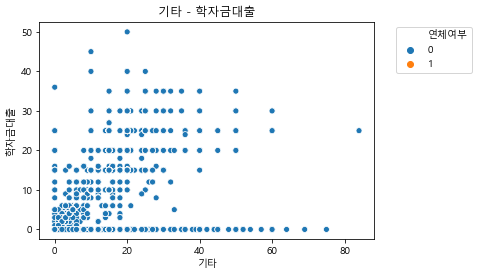

In [80]:
ax = sns.scatterplot(x = '대출건수_5개월_98', 
                     y = '대출건수_5개월_150', 
                     hue='연체여부',
                     data = df_m)


plt.title('기타 - 학자금대출')
plt.xlabel('기타')
plt.ylabel('학자금대출')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '1',bbox_inches='tight')

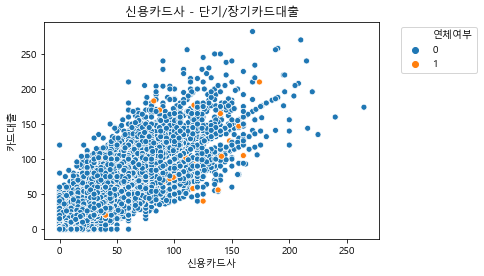

In [81]:
ax = sns.scatterplot(x = '대출건수_5개월_5', 
                     y = '대출건수_5개월_0', 
                     hue='연체여부',
                     data = df_m)

plt.title('신용카드사 - 단기/장기카드대출')
plt.xlabel('신용카드사')
plt.ylabel('카드대출')
plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '2',bbox_inches='tight')

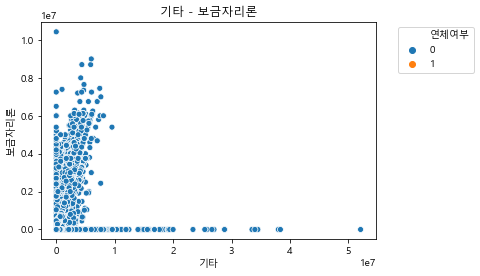

In [82]:
ax = sns.scatterplot(x = '대출금액_5개월_98', 
                     y = '대출금액_5개월_245', 
                     hue='연체여부',
                     data = df_m)


plt.title('기타 - 보금자리론')
plt.xlabel('기타')
plt.ylabel('보금자리론')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '3',bbox_inches='tight')

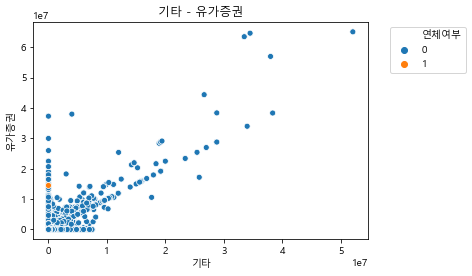

In [83]:
ax = sns.scatterplot(x = '대출금액_5개월_98', 
                     y = '대출금액_5개월_210', 
                     hue='연체여부',
                     data = df_m)


plt.title('기타 - 유가증권')
plt.xlabel('기타')
plt.ylabel('유가증권')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '4',bbox_inches='tight')

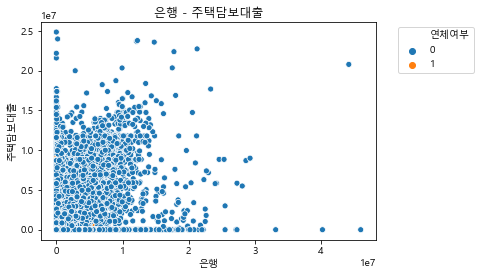

In [84]:
ax = sns.scatterplot(x = '대출금액_5개월_1', 
                     y = '대출금액_5개월_220', 
                     hue='연체여부',
                     data = df_m)


plt.title('은행 - 주택담보대출')
plt.xlabel('은행')
plt.ylabel('주택담보대출')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '6',bbox_inches='tight')

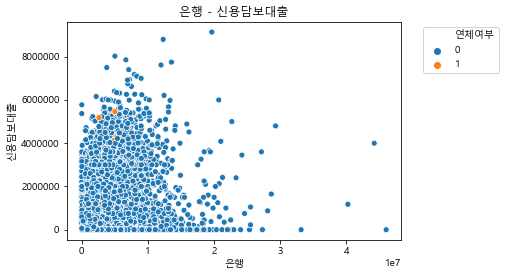

In [85]:
ax = sns.scatterplot(x = '대출금액_5개월_1', 
                     y = '대출금액_5개월_100', 
                     hue='연체여부',
                     data = df_m)


plt.title('은행 - 신용담보대출')
plt.xlabel('은행')
plt.ylabel('신용담보대출')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '5',bbox_inches='tight')

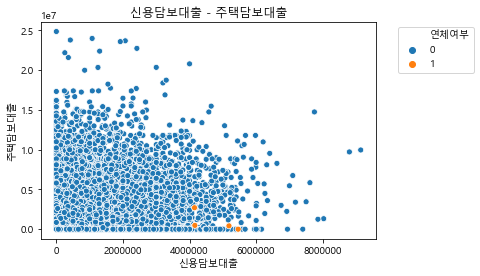

In [86]:
ax = sns.scatterplot(x = '대출금액_5개월_100', 
                     y = '대출금액_5개월_220', 
                     hue='연체여부',
                     data = df_m)


plt.title('신용담보대출 - 주택담보대출')
plt.xlabel('신용담보대출')
plt.ylabel('주택담보대출')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '7',bbox_inches='tight')

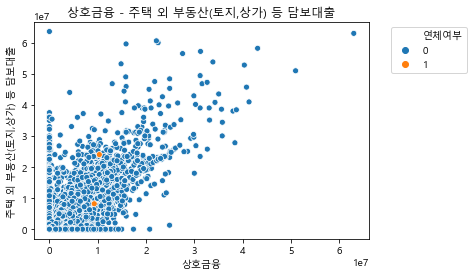

In [87]:
ax = sns.scatterplot(x = '대출금액_5개월_3', 
                     y = '대출금액_5개월_230', 
                     hue='연체여부',
                     data = df_m)


plt.title('상호금융 - 주택 외 부동산(토지,상가) 등 담보대출')
plt.xlabel('상호금융')
plt.ylabel('주택 외 부동산(토지,상가) 등 담보대출')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '8',bbox_inches='tight')

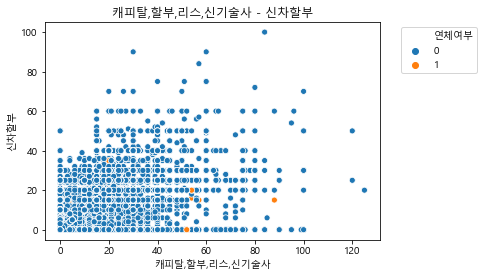

In [88]:
ax = sns.scatterplot(x = '대출건수_5개월_17', 
                     y = '대출건수_5개월_500', 
                     hue='연체여부',
                     data = df_m)


plt.title('캐피탈,할부,리스,신기술사 - 신차할부')
plt.xlabel('캐피탈,할부,리스,신기술사')
plt.ylabel('신차할부')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '9',bbox_inches='tight')

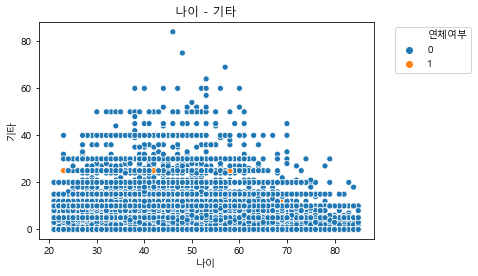

In [89]:
ax = sns.scatterplot(x = '나이', 
                     y = '대출건수_5개월_98', 
                     hue='연체여부',
                     data = df_m)


plt.title('나이 - 기타')
plt.xlabel('나이')
plt.ylabel('기타')

plt.legend(fontsize=10)
plt.legend(bbox_to_anchor = (1.05,1), loc='upper left')

fig = ax.get_figure
plt.show()

ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/scatter/'+ '10',bbox_inches='tight')

In [39]:
df_m['나이'].unique()

array([46, 66, 27, 54, 45, 39, 37, 50, 72, 26, 42, 28, 65, 51, 61, 33, 57,
       48, 56, 55, 34, 59, 32, 53, 44, 84, 38, 40, 35, 25, 60, 76, 41, 43,
       30, 52, 49, 77, 58, 36, 62, 47, 21, 31, 71, 63, 81, 74, 85, 73, 80,
       69, 82, 64, 23, 70, 22, 83, 67, 29, 68, 24, 79, 75, 78],
      dtype=int64)

In [40]:
df_m['대출건수_5개월_98'].unique()

array([ 0,  5, 10, 15,  3,  4, 12, 20,  8,  1, 25, 16, 27, 40,  2, 35,  6,
       39,  9, 30, 18, 21, 14,  7, 36, 45, 28, 50, 24, 52, 26, 13, 32, 22,
       44, 84, 54, 38, 60, 33, 69, 48, 42, 75, 64, 57], dtype=int64)

## 상관관계분석

대출건수, 카드개설 수 - 이산형 변수 --> 스피어만 상관분석 <br>
대출잔액 - 수치형변수 --> 피어슨 상관분석

## 1.대출건수 - 업권

스피어만 상관관계분석 결과, 업권간 뚜렷한 양적,음적 상관관계는 없음 <br>
단 나이와 기타업권에서 음의 상관관계를 보임 - 나이가 어릴수록 기타 업권에서 대출하는 경향이 큼 (기타 : 한국장학재단, 주택금융공사, 신용보증기금, 기술보증기금, 금융결제원)

In [37]:
대출건수_업권 = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/1.대출건수_업권.csv',encoding='cp949')

In [38]:
대출건수_업권.corr(method='spearman')

JOIN_KEY      생년월일        성별        나이  대출건수_5개월_1  대출건수_5개월_3  \
JOIN_KEY     1.000000 -0.001341 -0.002467  0.001341    0.001041   -0.001811   
생년월일        -0.001341  1.000000  0.001524 -1.000000    0.017645   -0.257110   
성별          -0.002467  0.001524  1.000000 -0.001524   -0.078022   -0.029217   
나이           0.001341 -1.000000 -0.001524  1.000000   -0.017645    0.257110   
대출건수_5개월_1   0.001041  0.017645 -0.078022 -0.017645    1.000000   -0.125073   
대출건수_5개월_3  -0.001811 -0.257110 -0.029217  0.257110   -0.125073    1.000000   
대출건수_5개월_5   0.000284 -0.041334  0.057936  0.041334    0.079999   -0.005920   
대출건수_5개월_6   0.000763 -0.021595  0.024953  0.021595    0.011293   -0.003938   
대출건수_5개월_8   0.000753 -0.061681  0.084072  0.061681   -0.006261   -0.012893   
대출건수_5개월_17  0.000052  0.021047 -0.063278 -0.021047    0.021637    0.027782   
대출건수_5개월_21 -0.001503  0.101751  0.006669 -0.101751   -0.003119   -0.037421   
대출건수_5개월_98  0.000440  0.353019 -0.004264 -0.353019   -0.062837   -0.126315   

             대출건수_5개월_5  대출건수_5개월_6  대출건수_5개월_8  대출건수_5개월_17  대출건수_5개월_21  \
JOIN_KEY       0.000284    0.000763    0.000753     0.000052    -0.001503   
생년월일          -0.041334   -0.021595   -0.061681     0.021047     0.101751   
성별             0.057936    0.024953    0.084072    -0.063278     0.006669   
나이             0.041334    0.021595    0.061681    -0.021047    -0.101751   
대출건수_5개월_1     0.079999    0.011293   -0.006261     0.021637    -0.003119   
대출건수_5개월_3    -0.005920   -0.003938   -0.012893     0.027782    -0.037421   
대출건수_5개월_5     1.000000    0.048971    0.112677     0.157589     0.183016   
대출건수_5개월_6     0.048971    1.000000    0.039654     0.019974     0.009151   
대출건수_5개월_8     0.112677    0.039654    1.000000     0.027139     0.025623   
대출건수_5개월_17    0.157589    0.019974    0.027139     1.000000     0.105560   
대출건수_5개월_21    0.183016    0.009151    0.025623     0.105560     1.000000   
대출건수_5개월_98   -0.082502   -0.026803   -0.055268    -0.060312    -0.025361   

             대출건수_5개월_98  
JOIN_KEY        0.000440  
생년월일            0.353019  
성별             -0.004264  
나이             -0.353019  
대출건수_5개월_1     -0.062837  
대출건수_5개월_3     -0.126315  
대출건수_5개월_5     -0.082502  
대출건수_5개월_6     -0.026803  
대출건수_5개월_8     -0.055268  
대출건수_5개월_17    -0.060312  
대출건수_5개월_21    -0.025361  
대출건수_5개월_98     1.000000

In [ ]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출잔액_업권x상품.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')

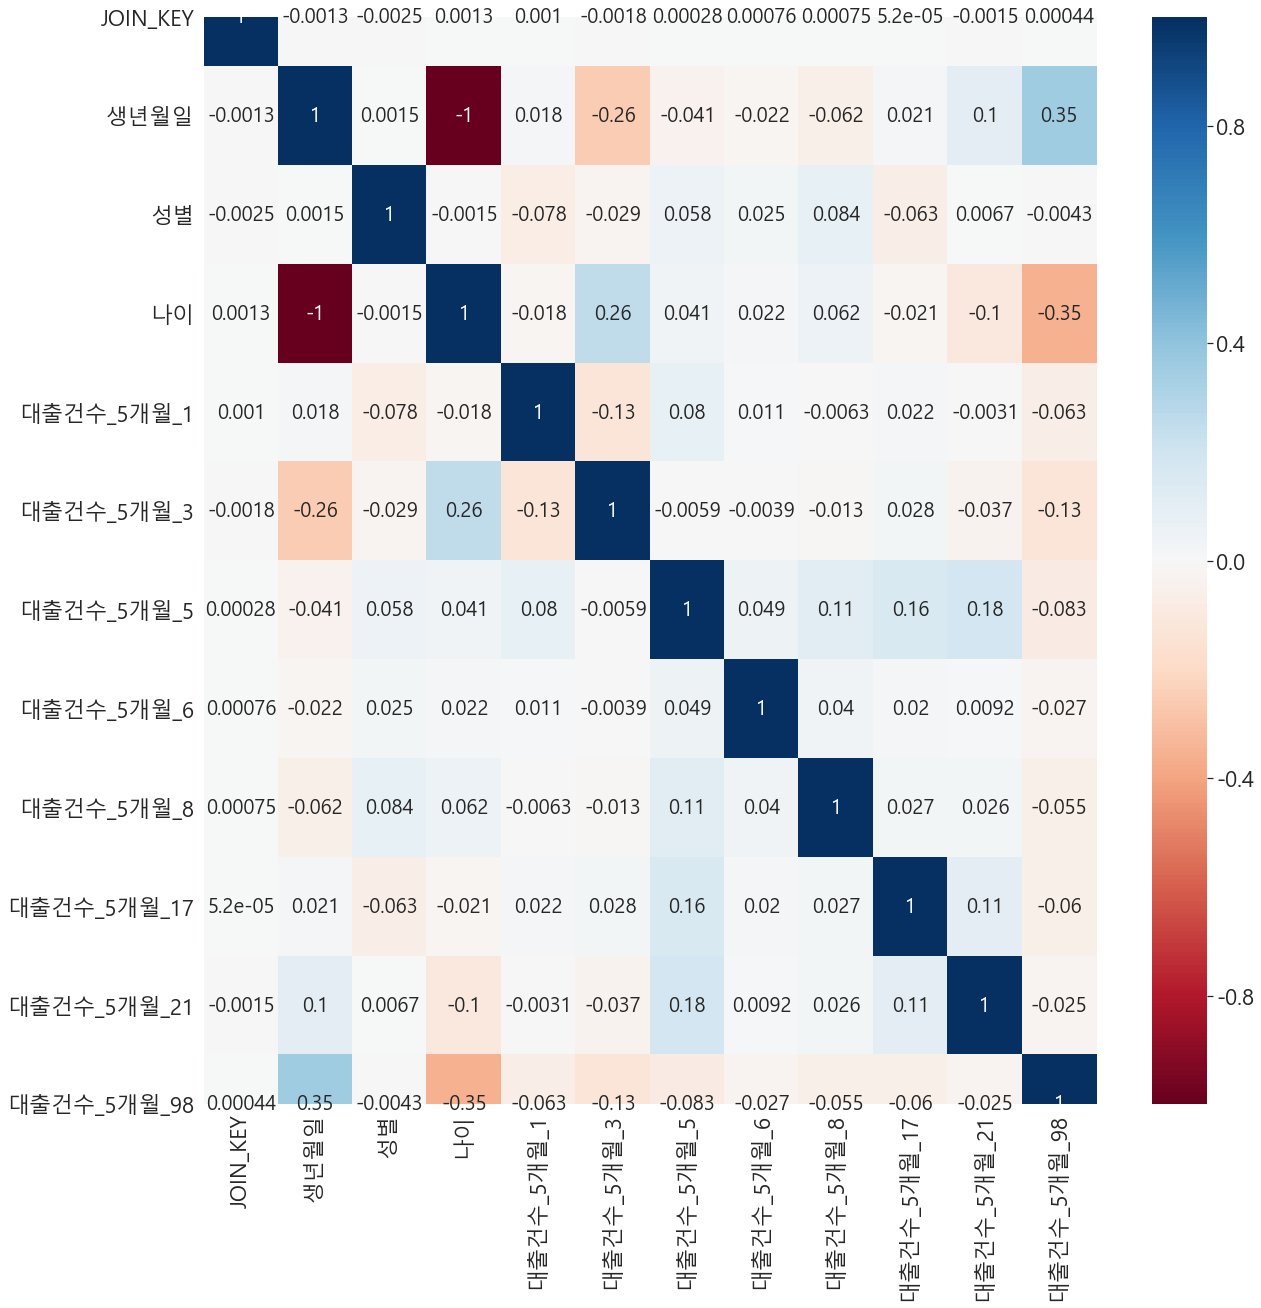

In [48]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출건수_업권.corr(method='spearman'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu',annot_kws={'size':20})
sns.set(font_scale=2)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/correlation/1.대출건수_업권.png')

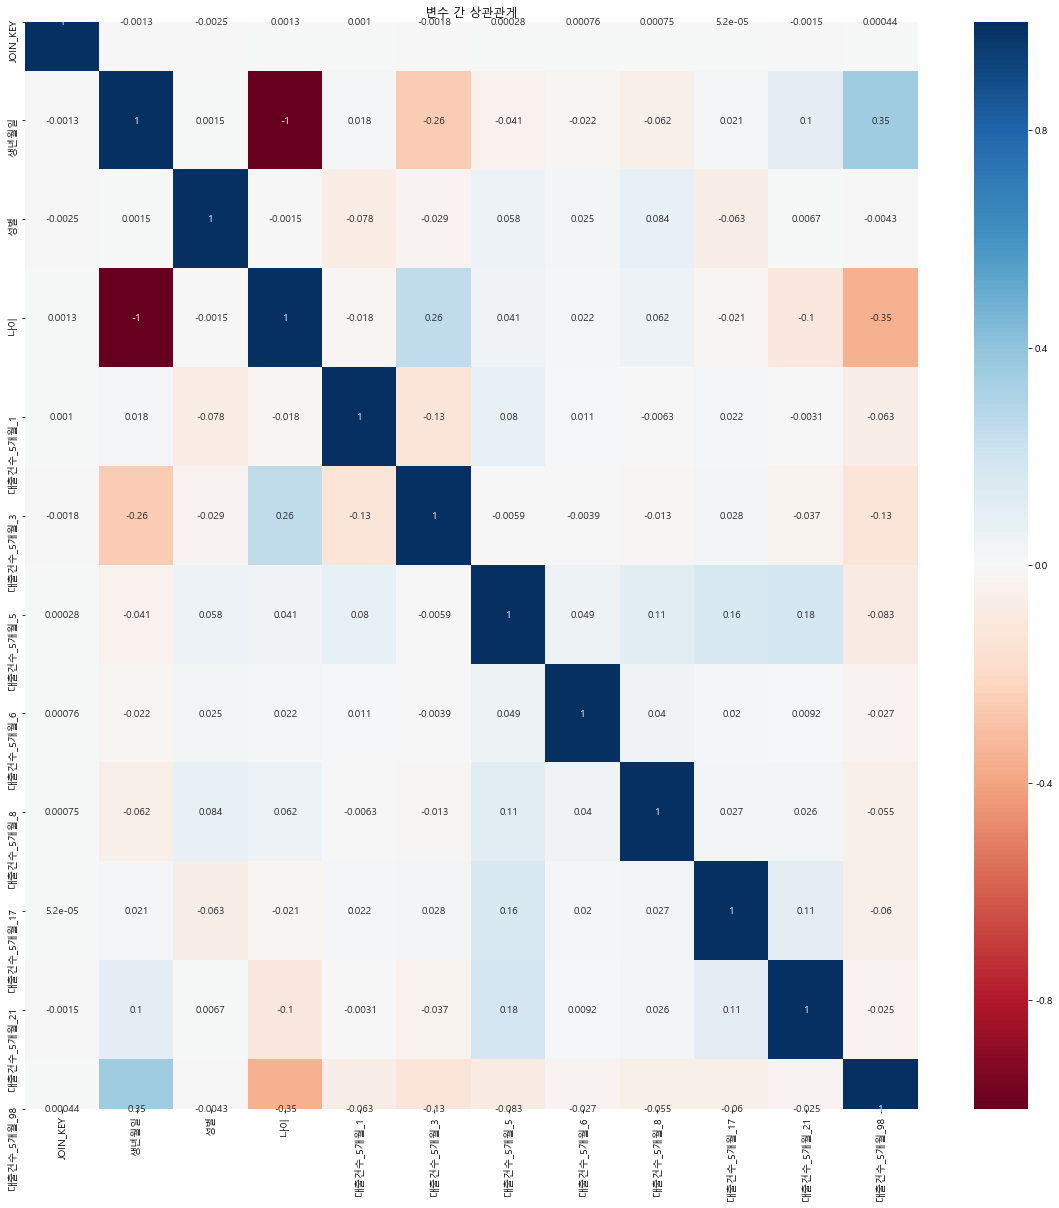

In [15]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출건수_업권.corr(method='spearman'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data\correlation/png/1.대출건수_업권.png')

## 2.대출건수 - 상품

In [49]:
대출건수_상품 = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/2.대출건수_상품.csv',encoding='cp949')

In [18]:
대출건수_상품.corr(method='spearman')

JOIN_KEY      생년월일        성별        나이  대출건수_5개월_0  \
JOIN_KEY      1.000000 -0.001341 -0.002467  0.001341    0.000119   
생년월일         -0.001341  1.000000  0.001524 -1.000000   -0.057017   
성별           -0.002467  0.001524  1.000000 -0.001524    0.068773   
나이            0.001341 -1.000000 -0.001524  1.000000    0.057017   
대출건수_5개월_0    0.000119 -0.057017  0.068773  0.057017    1.000000   
대출건수_5개월_100  0.000290 -0.030239 -0.100389  0.030239    0.164117   
대출건수_5개월_150  0.001361  0.405833  0.035538 -0.405833   -0.079417   
대출건수_5개월_170 -0.000781 -0.008020 -0.002265  0.008020    0.004388   
대출건수_5개월_200  0.000205 -0.011112  0.025524  0.011112    0.028501   
대출건수_5개월_210 -0.001354 -0.017629 -0.031647  0.017629    0.002951   
대출건수_5개월_220  0.000560 -0.187671 -0.028923  0.187671   -0.075015   
대출건수_5개월_230 -0.002569 -0.179738 -0.025330  0.179738   -0.067447   
대출건수_5개월_240 -0.000304  0.132715 -0.037769 -0.132715    0.116575   
대출건수_5개월_245 -0.000649  0.045036 -0.039759 -0.045036   -0.047445   
대출건수_5개월_250  0.001809  0.058741 -0.003387 -0.058741    0.000470   
대출건수_5개월_270  0.000521  0.147715 -0.018407 -0.147715   -0.058199   
대출건수_5개월_271 -0.000519  0.000307 -0.000781 -0.000307    0.001198   
대출건수_5개월_290  0.000995  0.025344 -0.045626 -0.025344    0.072773   
대출건수_5개월_500  0.001634 -0.000735 -0.078880  0.000735    0.013319   
대출건수_5개월_510  0.000953  0.019770 -0.045636 -0.019770    0.055057   
대출건수_5개월_590 -0.000845 -0.022714  0.020600  0.022714    0.021946   
대출건수_5개월_700  0.000488  0.012631 -0.014554 -0.012631   -0.006904   
대출건수_5개월_710  0.000420  0.009908 -0.009549 -0.009908    0.003741   
총대출건수         0.000462 -0.037987 -0.056046  0.037987    0.526205   
개설카드수5       -0.002124 -0.070806  0.058343  0.070806    0.142539   

              대출건수_5개월_100  대출건수_5개월_150  대출건수_5개월_170  대출건수_5개월_200  \
JOIN_KEY          0.000290      0.001361     -0.000781      0.000205   
생년월일             -0.030239      0.405833     -0.008020     -0.011112   
성별               -0.100389      0.035538     -0.002265      0.025524   
나이                0.030239     -0.405833      0.008020      0.011112   
대출건수_5개월_0        0.164117     -0.079417      0.004388      0.028501   
대출건수_5개월_100      1.000000     -0.128929      0.008184      0.027745   
대출건수_5개월_150     -0.128929      1.000000     -0.005712     -0.019540   
대출건수_5개월_170      0.008184     -0.005712      1.000000      0.005048   
대출건수_5개월_200      0.027745     -0.019540      0.005048      1.000000   
대출건수_5개월_210      0.061656     -0.027825     -0.001032      0.036730   
대출건수_5개월_220      0.072748     -0.158832     -0.016113     -0.032626   
대출건수_5개월_230      0.037799     -0.071894     -0.006715     -0.014656   
대출건수_5개월_240      0.215529      0.013796     -0.001013      0.021788   
대출건수_5개월_245      0.008033     -0.045028     -0.005532     -0.016414   
대출건수_5개월_250     -0.004338      0.076480     -0.000283      0.000785   
대출건수_5개월_270     -0.001169     -0.010632      0.022190      0.023084   
대출건수_5개월_271      0.004266     -0.010709      0.004017      0.008436   
대출건수_5개월_290      0.059276     -0.014044      0.006045      0.005472   
대출건수_5개월_500      0.029080     -0.057460     -0.001401     -0.015806   
대출건수_5개월_510      0.017756     -0.019315     -0.000873     -0.009684   
대출건수_5개월_590      0.000684     -0.014988     -0.000198     -0.003583   
대출건수_5개월_700      0.008567     -0.010208     -0.002025     -0.000954   
대출건수_5개월_710      0.007930     -0.012488      0.000437      0.001134   
총대출건수             0.633534     -0.053300      0.013706      0.111514   
개설카드수5            0.194184     -0.210960     -0.001312      0.043631   

              대출건수_5개월_210  대출건수_5개월_220  대출건수_5개월_230  대출건수_5개월_240  \
JOIN_KEY         -0.001354      0.000560     -0.002569     -0.000304   
생년월일             -0.017629     -0.187671     -0.179738      0.132715   
성별               -0.031647     -0.028923     -0.025330     -0.037769   
나이                0.017629      0.187671      0.179738     -0.132715   
대출건수_5개월_0  

나이 - 상품 150 (학자금대출) - 즉 당연히도 나이가 어릴 수록 학자금 대출 빈도가 높지 : -0.41 <br> 
그 외 뚜렷한 상품간 상관관계는 없음

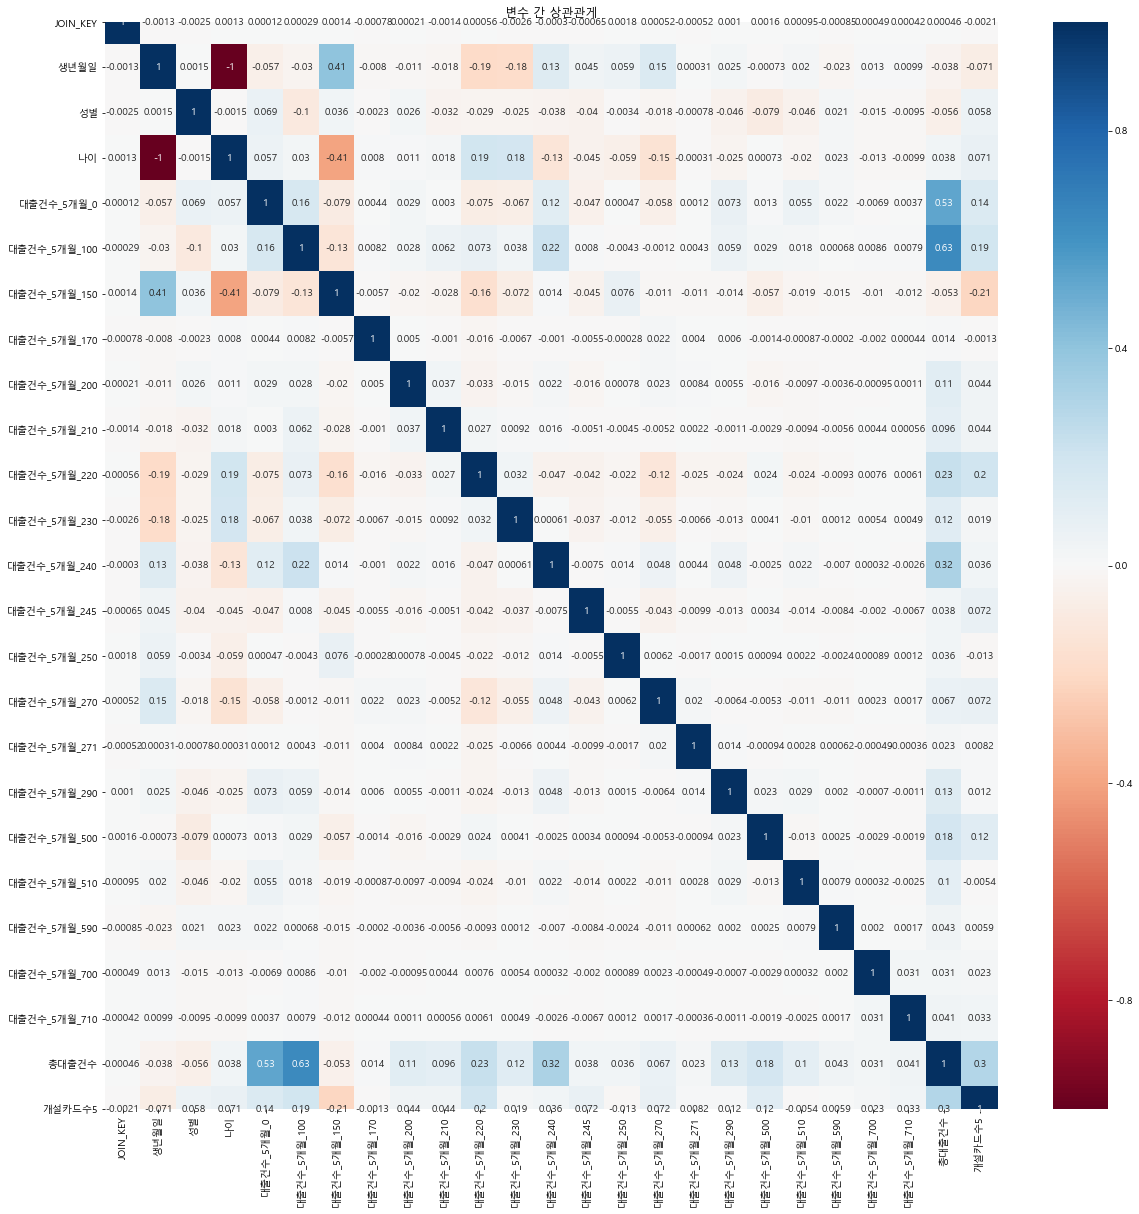

In [19]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출건수_상품.corr(method='spearman'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/png/2.대출상품_업권.png')

## 3. 대출건수 - 업권 x 상품

In [51]:
대출건수_업권x상품 = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/3.대출건수_업권x상품.csv',encoding='cp949')

In [26]:
대출건수_업권x상품 = 대출건수_업권x상품.iloc[:,4:]

★5업권(신용카드사)  0상품(카드대출론) 0.91 <br> 
★17업권(캐피탈,할부,리스,신기술사)  500상품(신차할부) 0.59 <br>
★98업권(기타)  150상품(학자금대출) 0.77 <br>

In [ ]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출건수_업권x상품.corr(method='spearman'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu',annot_kws={'size':20})
sns.set(font_scale=2)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/correlation/3.대출건수_업권x상품.png')

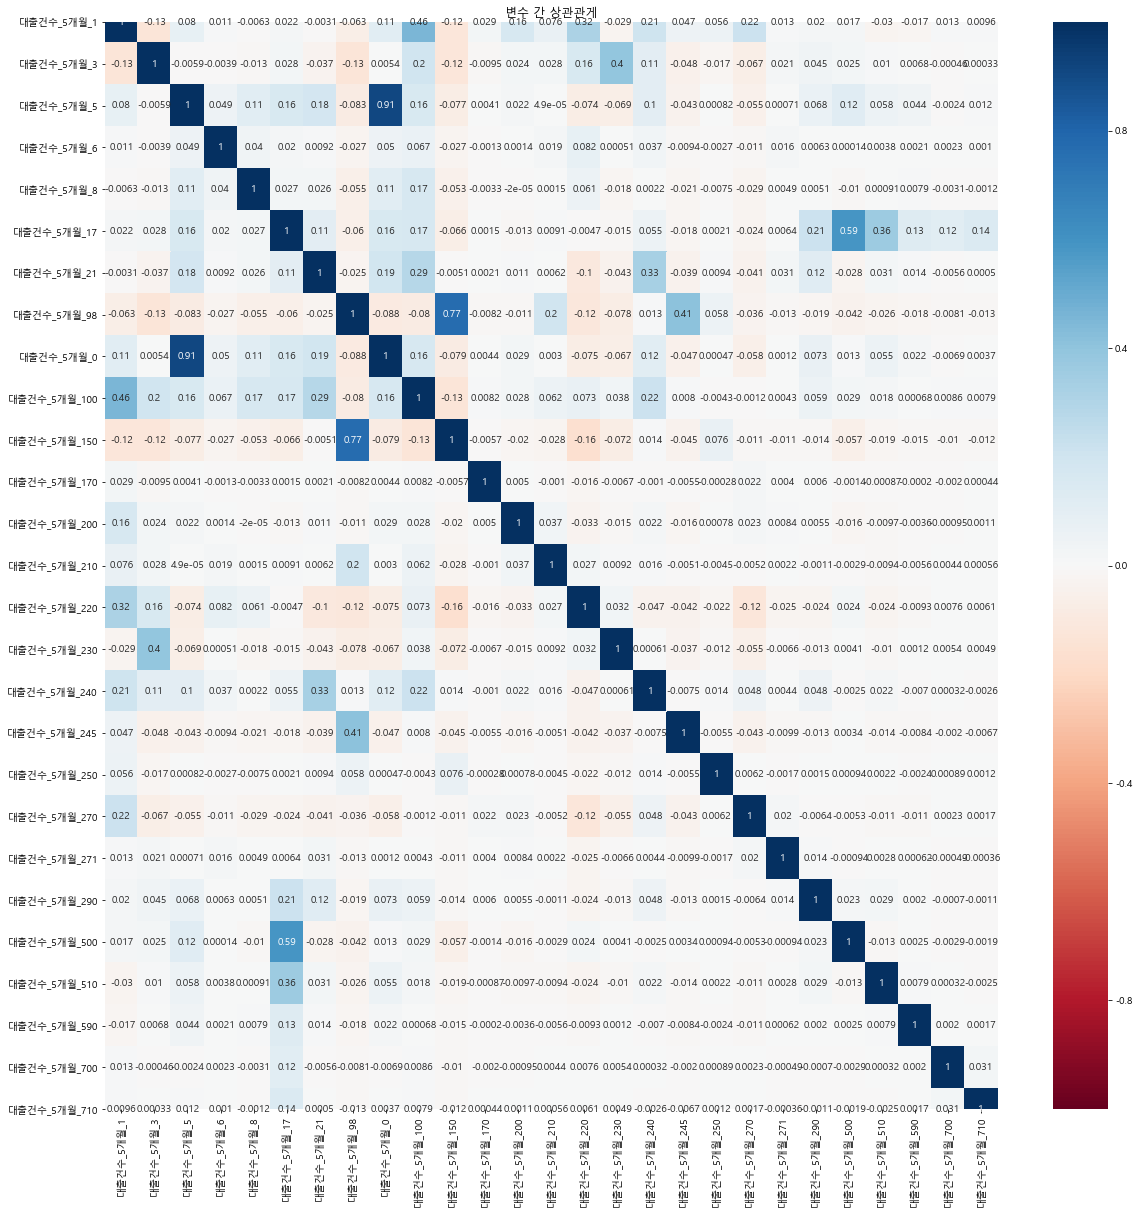

In [27]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출건수_업권x상품.corr(method='spearman'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/png/3.대출건수_업권x상품.png')

## 4.대출잔액 - 업권

잔액은 pearson 상관관계분석을 하고자함

업권 간 상관관계 없음

In [23]:
대출잔액_업권 = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/4.대출잔액_업권.csv',encoding='cp949')

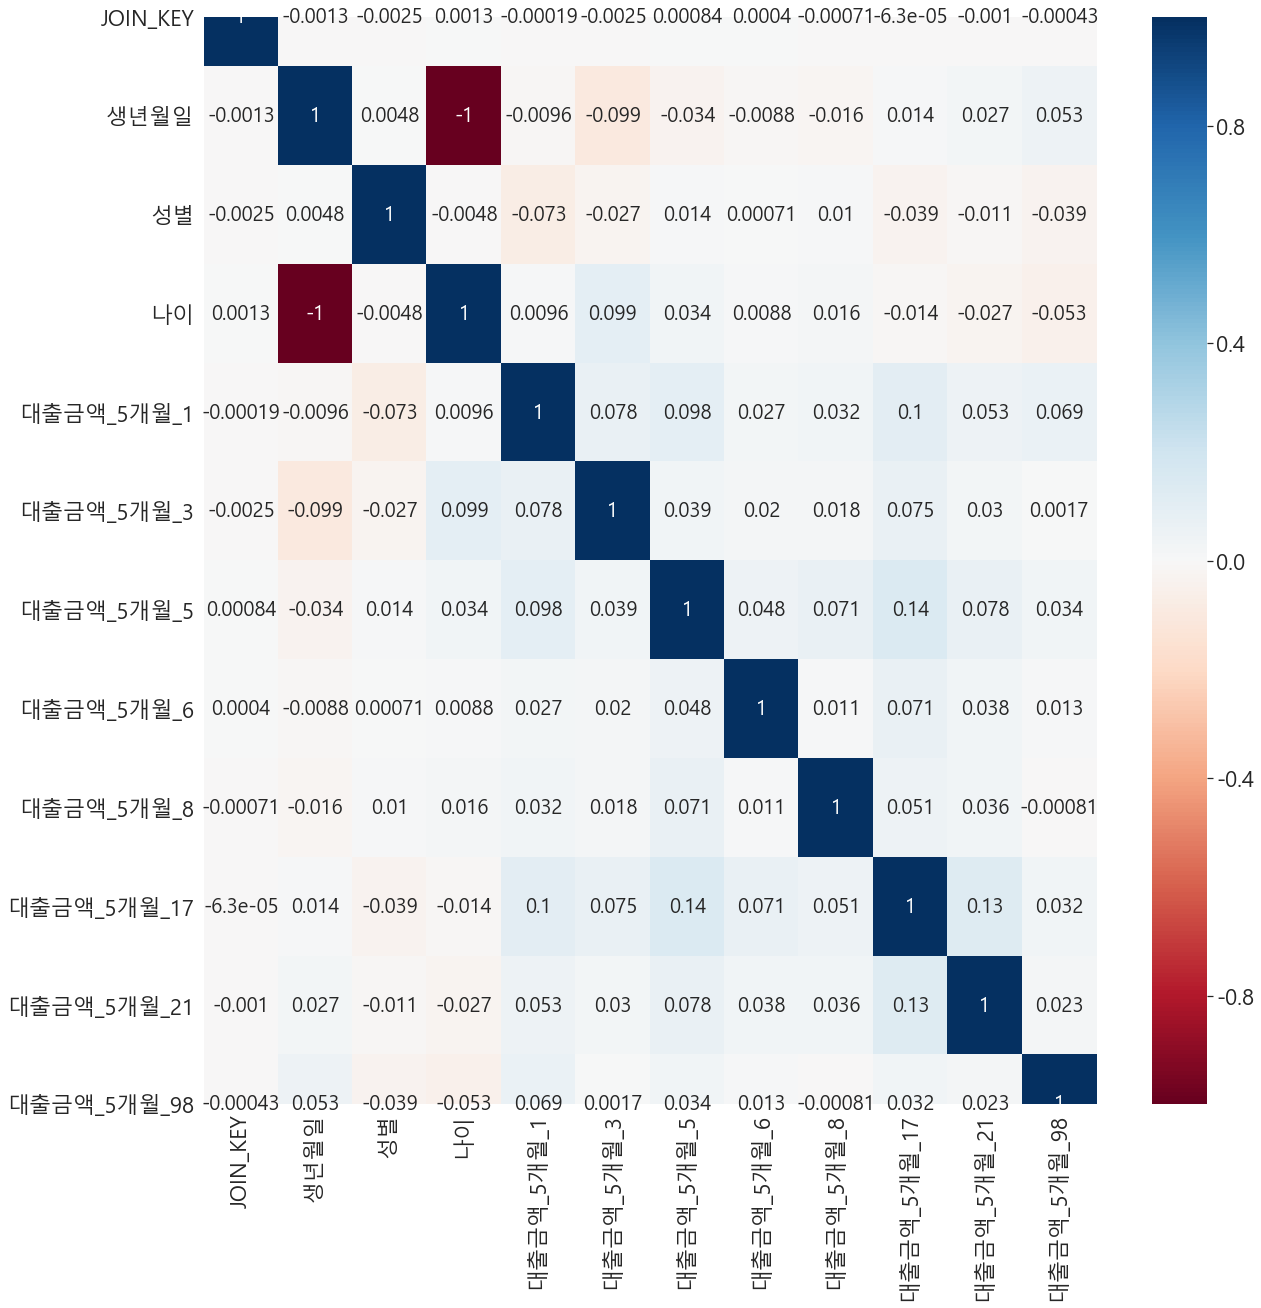

In [27]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출잔액_업권.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu',annot_kws={'size':20})
sns.set(font_scale=2)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/correlation/4.대출잔액_업권.png')

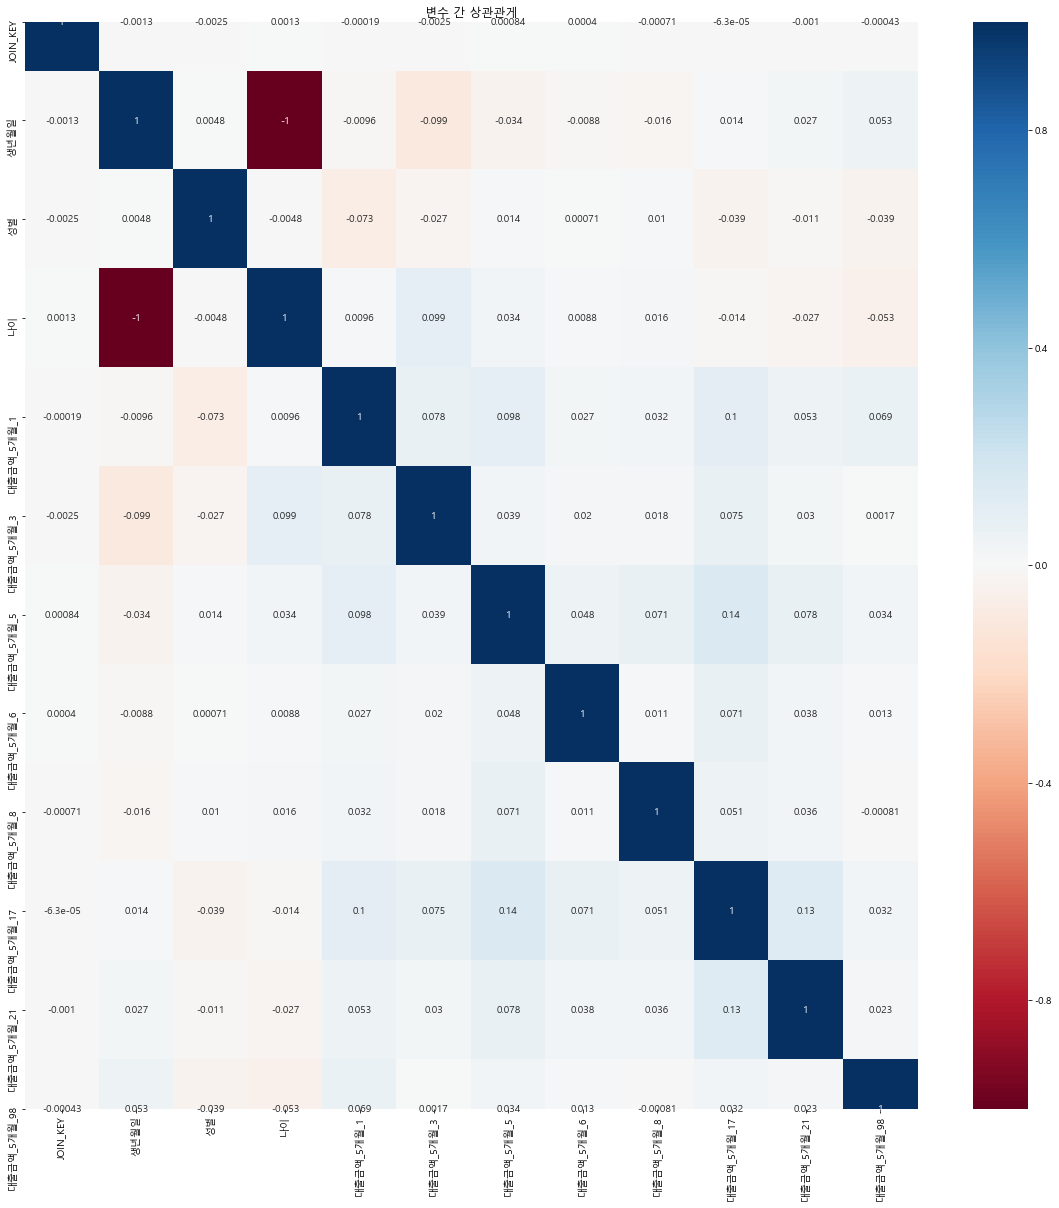

In [30]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출잔액_업권.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/png/4.대출잔액_업권.png')

## 5.대출잔액 - 상품

100(신용대출) - 220(주택담보대출) 0.34 

In [ ]:
대출잔액_상품 = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/5.대출잔액_상품.csv',encoding='cp949')

In [ ]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출잔액_상품.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu',annot_kws={'size':20})
sns.set(font_scale=2)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/correlation/5.대출잔액_상품.png')

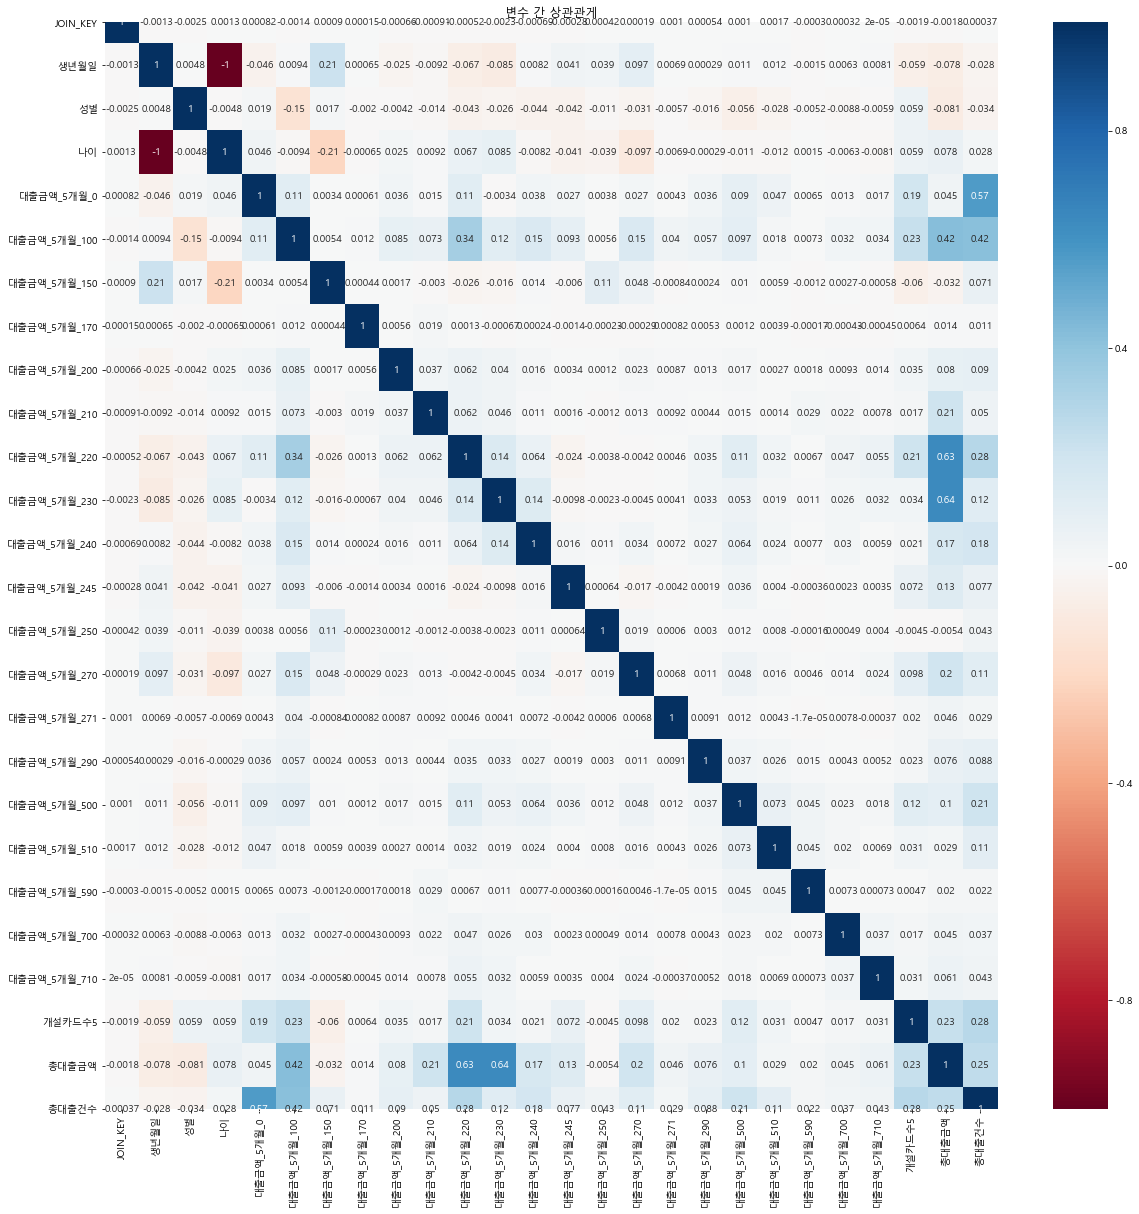

In [33]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출잔액_상품.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/png/5.대출잔액_상품.png')

## 6.대출잔액 - 업권 x 상품

업권1(은행) -  상품100(신용대출) 0.49 <br>
★업권1(은행) - 상품220(주택담보대출) 0.66 <br>

★업권3(상호금융) - 상품230(주택외부동산) 0.75 <br>

★업권5(신용카드사) - 상품000(카드론) 0.83 <br>

업권17(캐피탈,할부,리스) - 상품500(신차할부) 0.45 <br>

★업권98(기타) 상품210(유가증권) 0.5 <br>
★업권98(기타) 상품245(보금자리론) 0.62 <br>

In [ ]:
대출잔액_업권x상품 = pd.read_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/6.대출잔액_업권x상품.csv',encoding='cp949')

In [ ]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출잔액_업권x상품.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu',annot_kws={'size':20})
sns.set(font_scale=2)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/correlation/6.대출잔액_업권x상품.png')

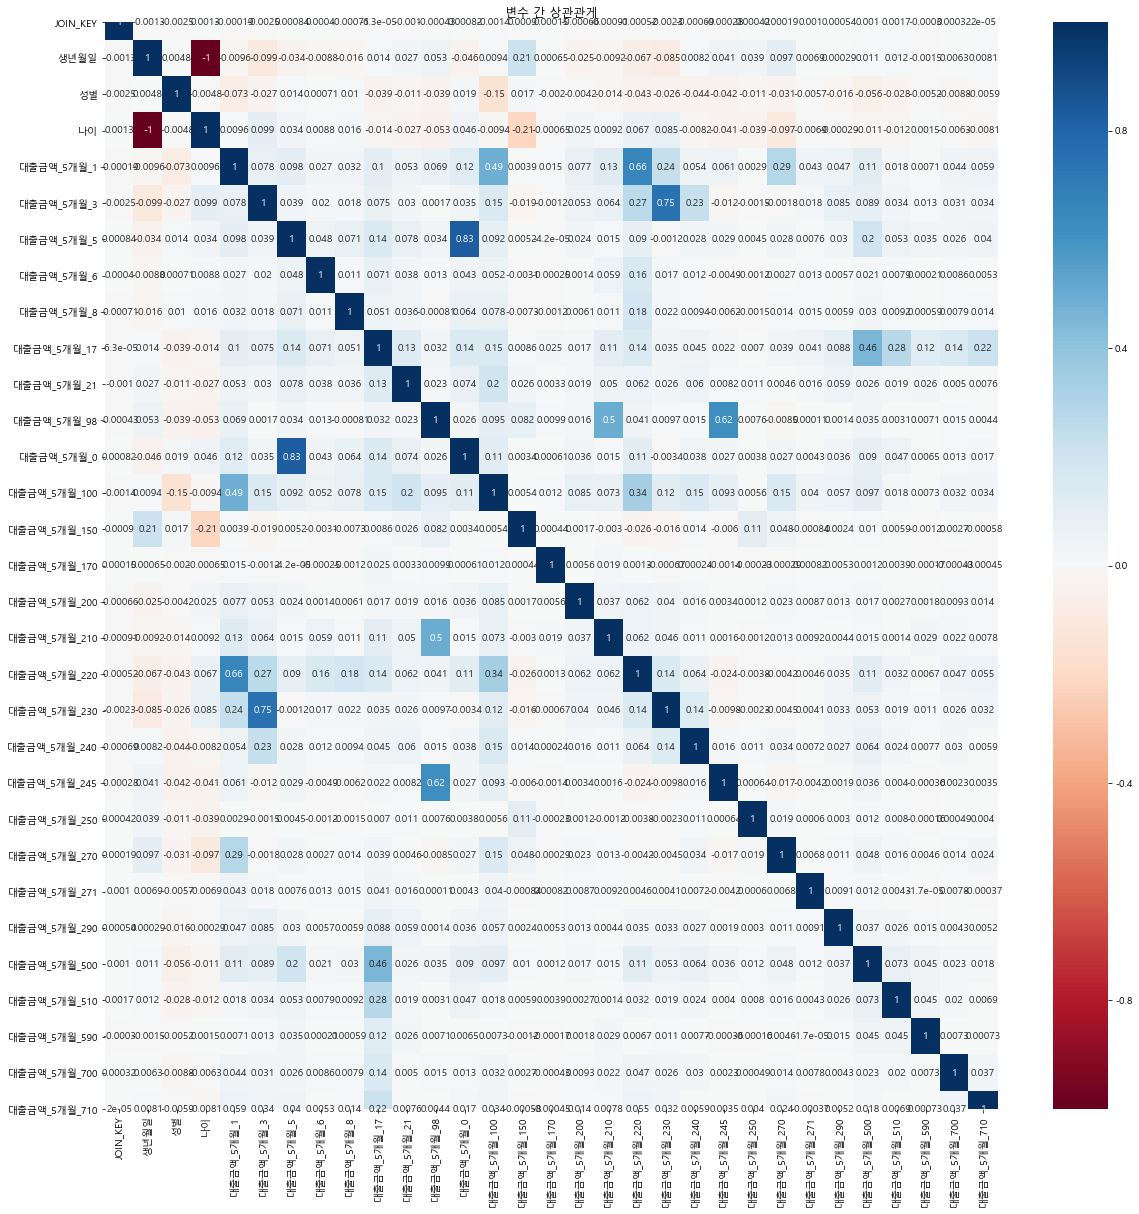

In [37]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(대출잔액_업권x상품.corr(method='pearson'),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 12)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/png/6.대출잔액_업권x상품.png')

In [ ]:
df.corr()

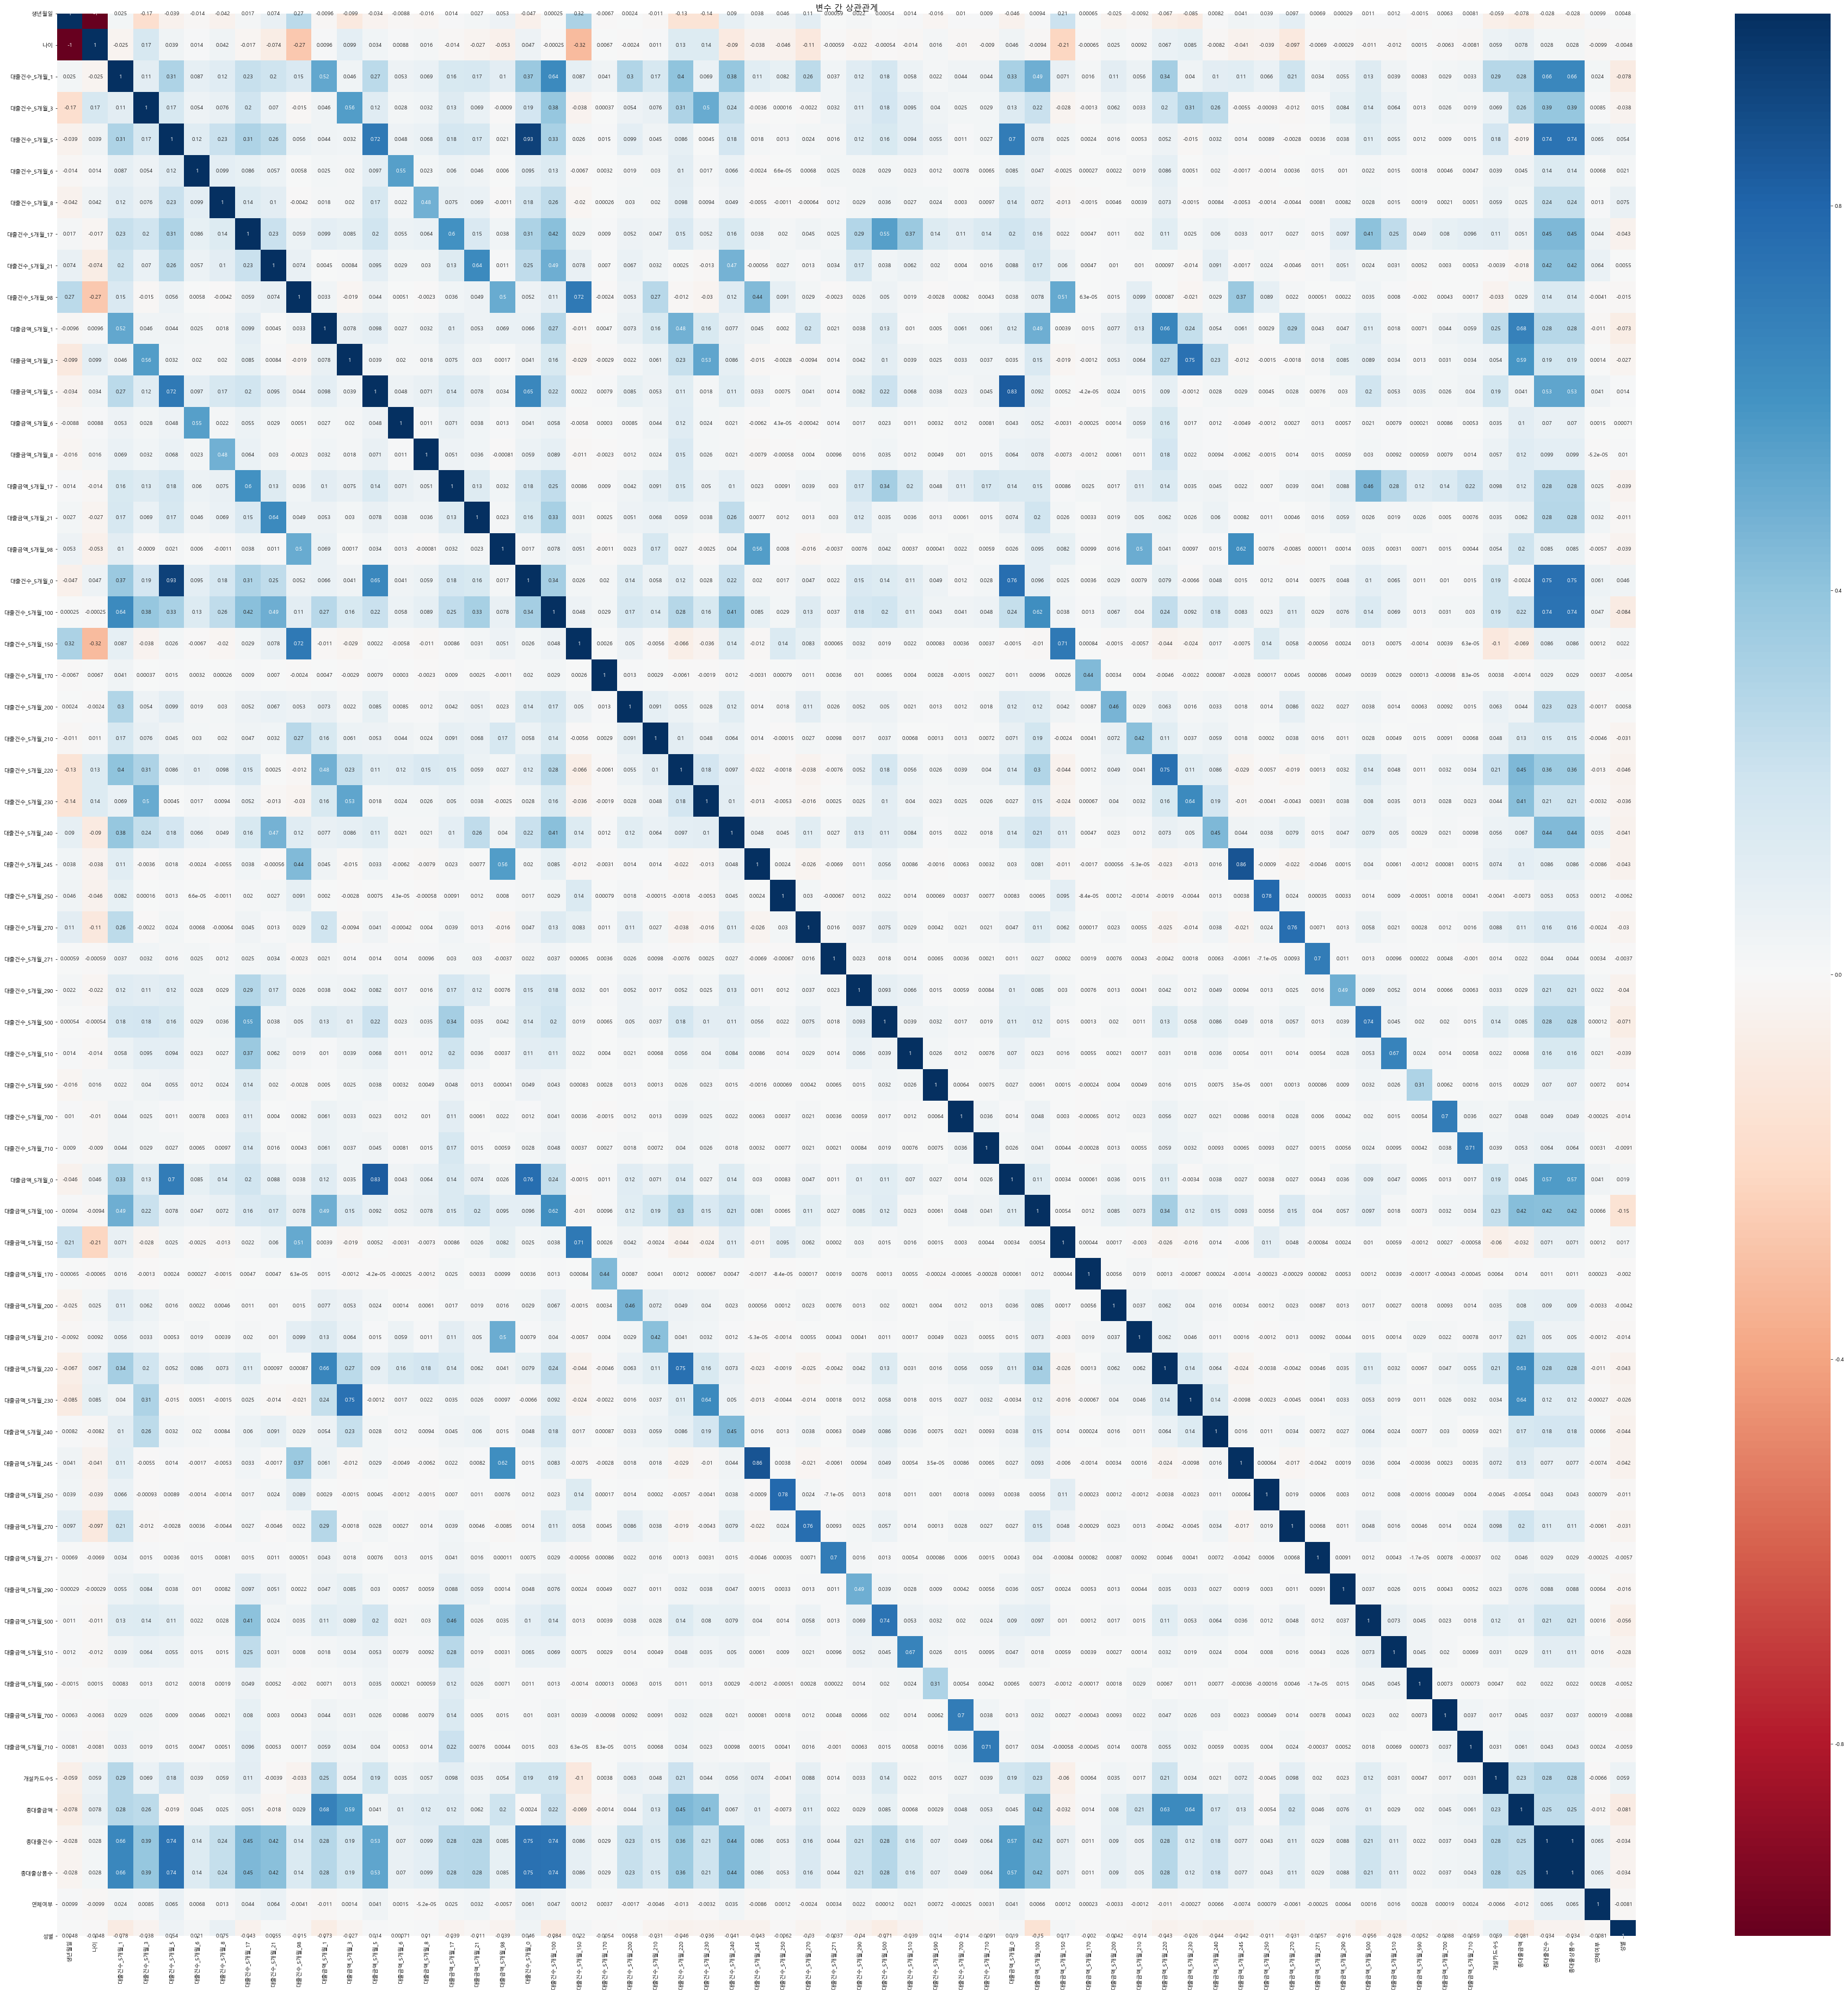

In [33]:
plt.figure(figsize = (65,65))
ax = sns.heatmap(df_m.corr(),vmin=-1, vmax=1, annot=True, cmap = 'RdBu')
plt.title('변수 간 상관관게', fontsize = 15)
plt.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/png/feature_corr.png')

In [41]:
corr_df = df.corr()

In [59]:
over50__ = corr_df[corr_df>=0.5]
over50__.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/0.5이상.csv',encoding='cp949')

In [39]:
"""
over50 = corr_df[(corr_df>=0.5)&(corr_df<0.6)]
over60 = corr_df[(corr_df>=0.6) & (corr_df < 0.7)]
over70 = corr_df[(corr_df>=0.7) & (corr_df < 0.8)]
over80 = corr_df[(corr_df>=0.8) & (corr_df < 0.9)]
over90 = corr_df[corr_df>=0.9]
"""

'\nover50 = corr_df[(corr_df>=0.5)&(corr_df<0.6)]\nover60 = corr_df[(corr_df>=0.6) & (corr_df < 0.7)]\nover70 = corr_df[(corr_df>=0.7) & (corr_df < 0.8)]\nover80 = corr_df[(corr_df>=0.8) & (corr_df < 0.9)]\nover90 = corr_df[corr_df>=0.9]\n'

In [38]:
"""
over50.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/50-60.csv',encoding='cp949')
over60.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/60-70.csv',encoding='cp949')
over70.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/70-80.csv',encoding='cp949')
over80.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/80-90.csv',encoding='cp949')
over90.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/90.csv',encoding='cp949')
"""

"\nover50.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/50-60.csv',encoding='cp949')\nover60.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/60-70.csv',encoding='cp949')\nover70.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/70-80.csv',encoding='cp949')\nover80.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/80-90.csv',encoding='cp949')\nover90.to_csv('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/data/correlation/90.csv',encoding='cp949')\n"

In [60]:
df_m.columns[1]

'나이'

*데이터에 0값이 매우 많아서 (결측치 처리한 것) boxplot상 이렇게 나올수밖에 없음 <br>
즉 대출한 건수보다 대출하지 않은 건수가 압도적으로 많기 때문에 발생

In [ ]:
ax = sns.countplot('연체여부', data = df_m)
plt.title('연체여부 \n (0:정상 || 1:채무불이행)')
fig = ax.get_figure()
plt.show()
ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png//Class Distribution')

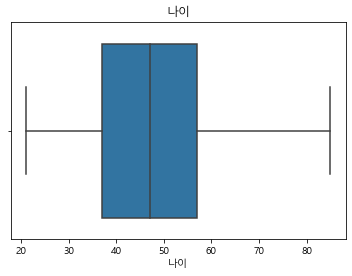

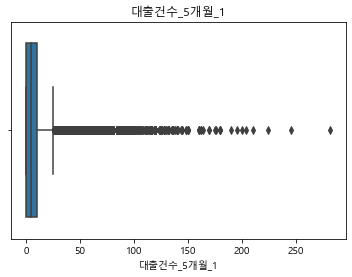

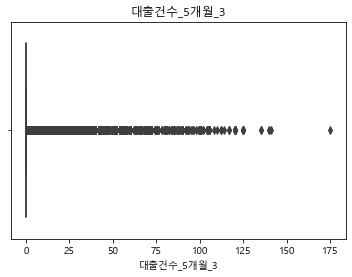

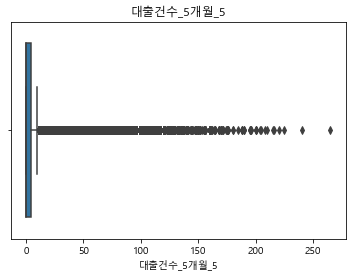

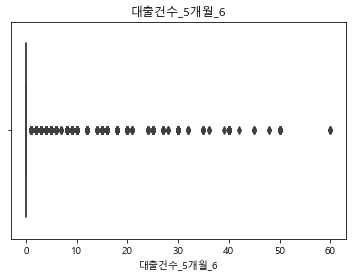

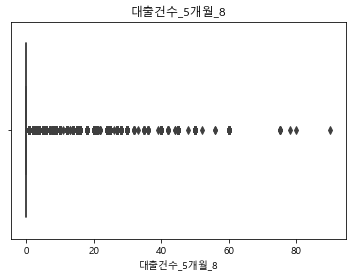

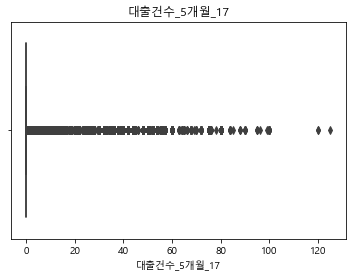

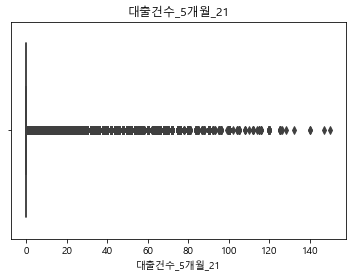

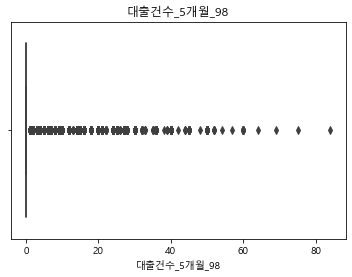

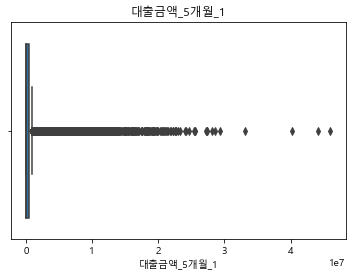

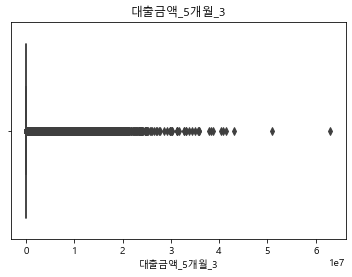

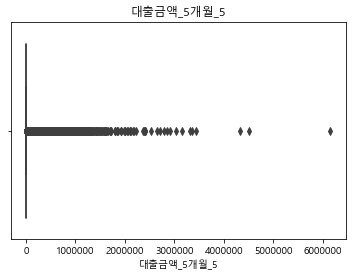

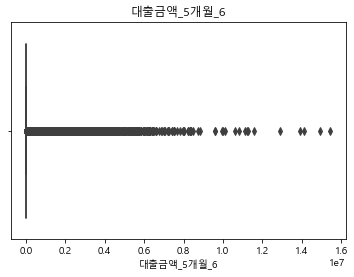

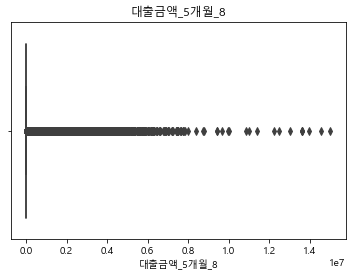

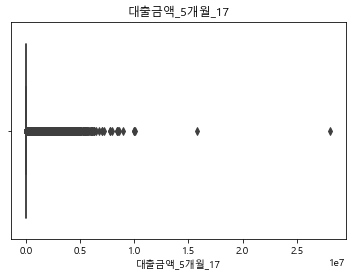

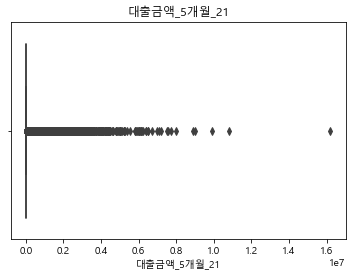

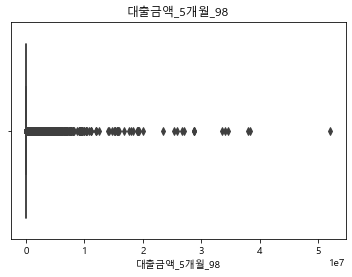

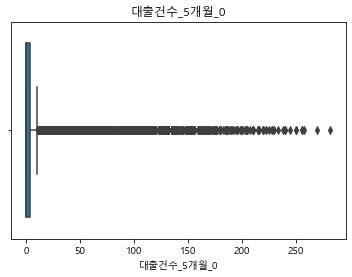

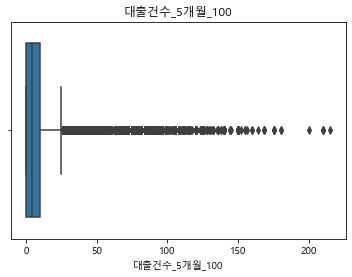

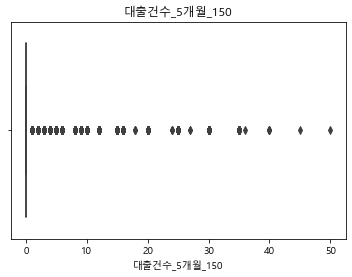

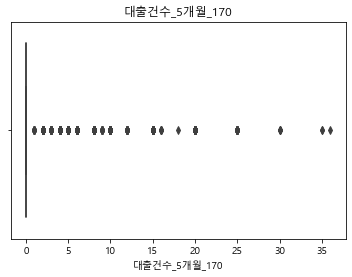

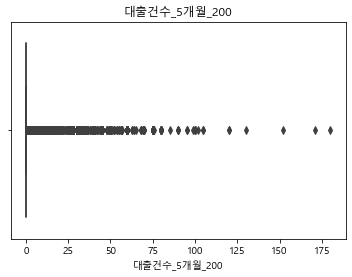

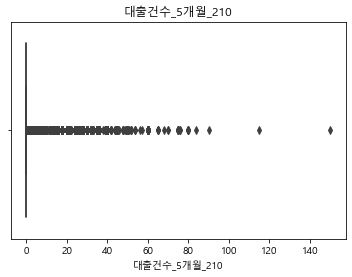

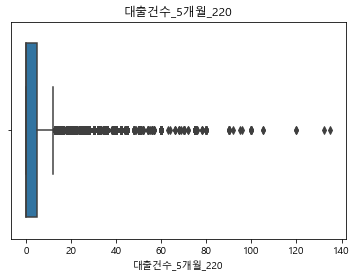

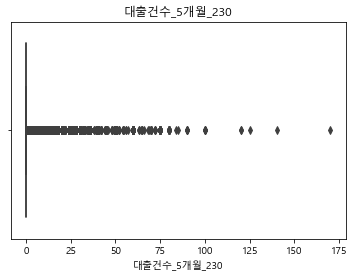

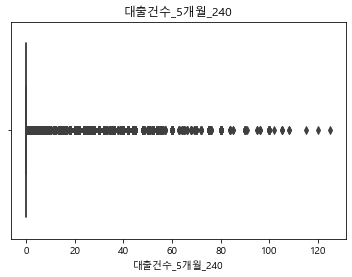

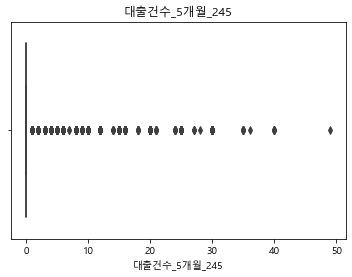

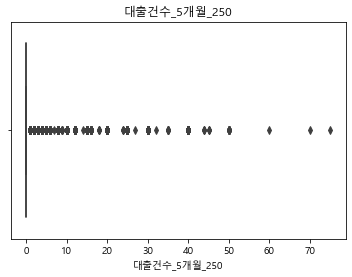

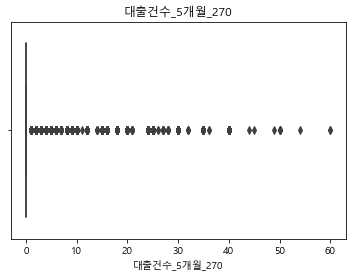

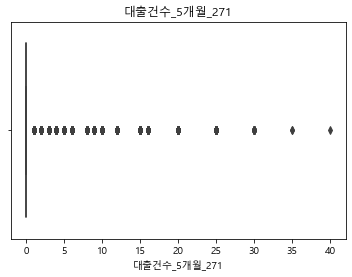

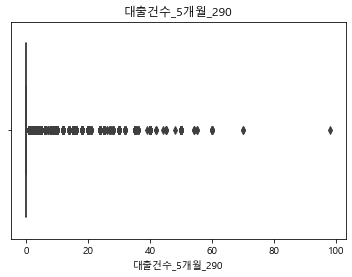

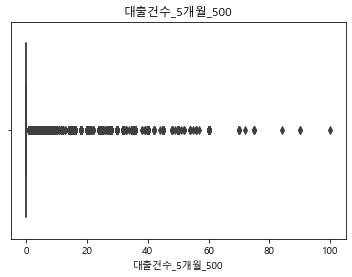

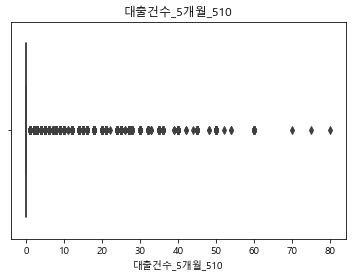

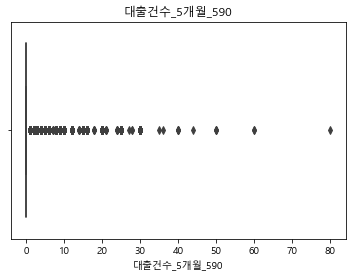

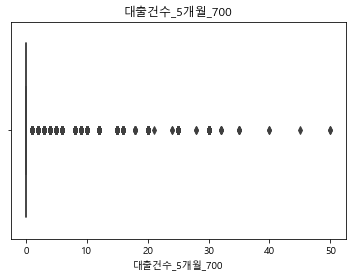

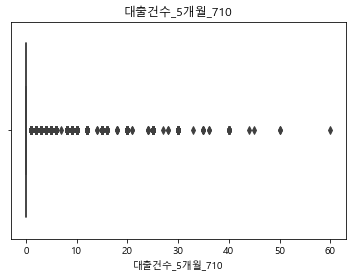

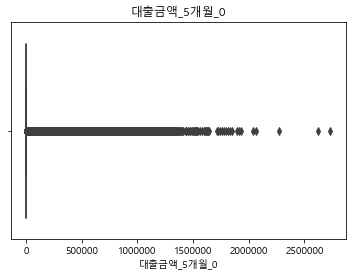

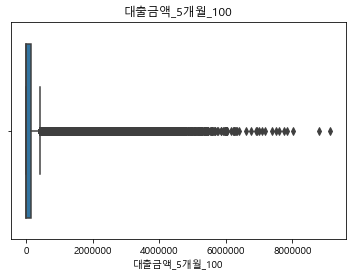

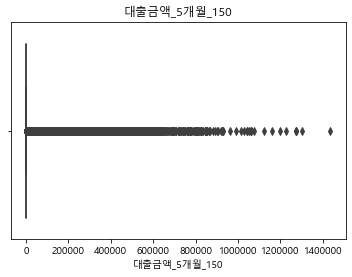

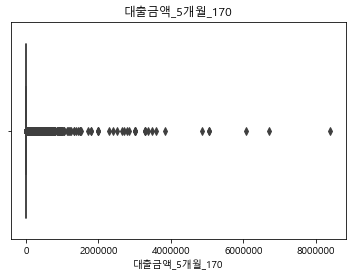

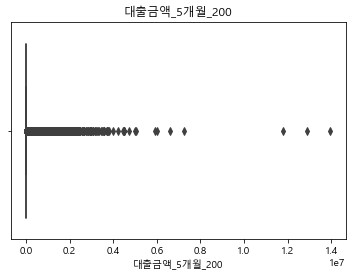

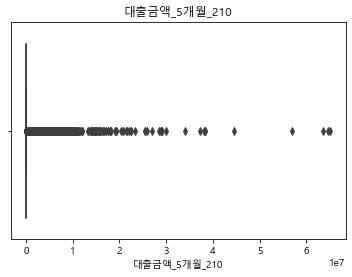

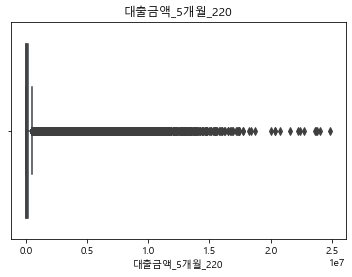

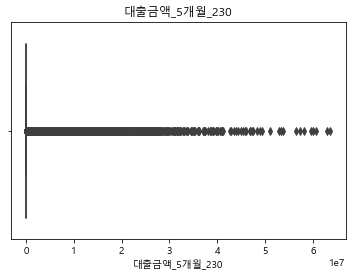

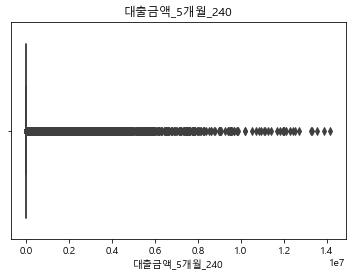

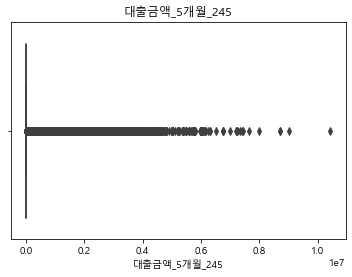

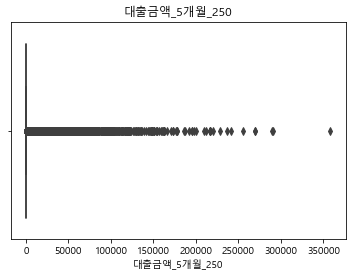

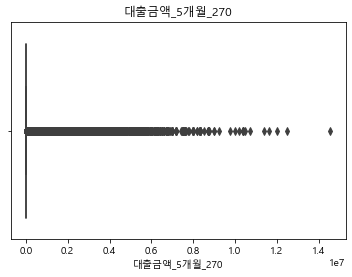

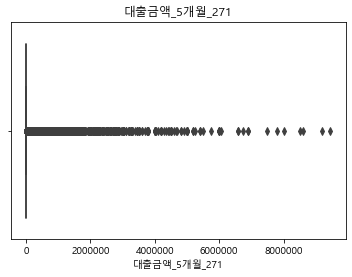

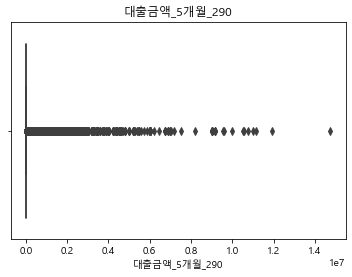

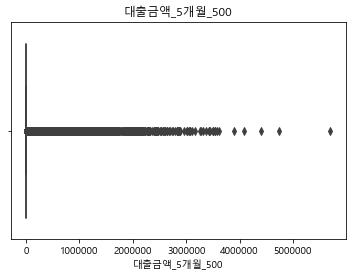

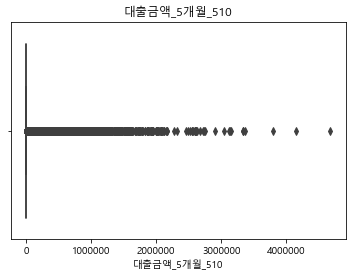

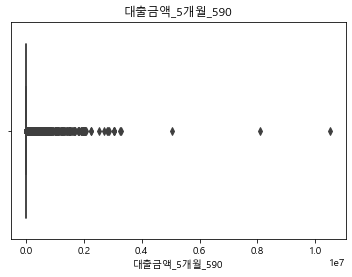

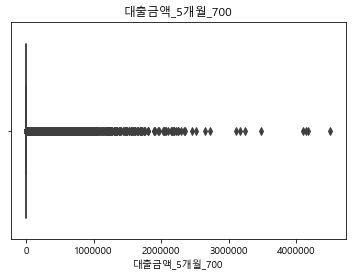

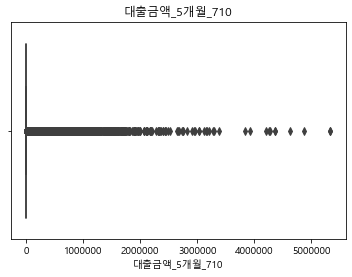

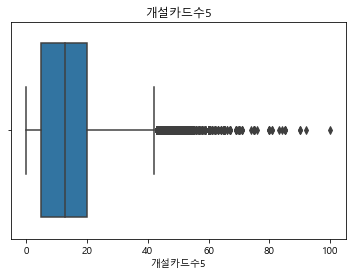

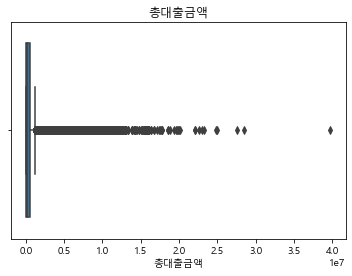

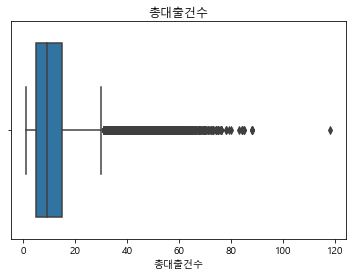

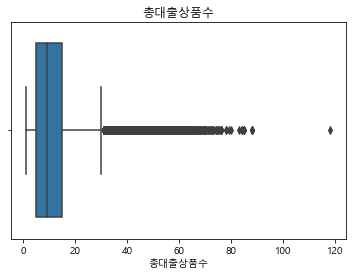

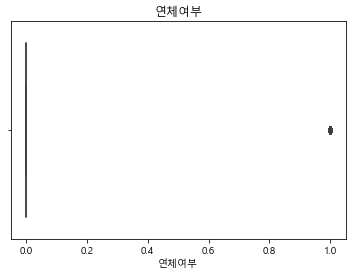

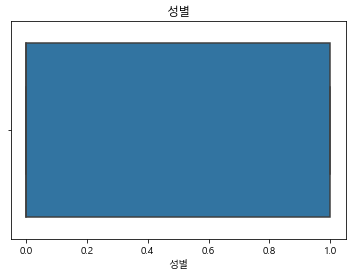

In [32]:
for i in range(1,len(df_m.columns)):
    try:
        ax = sns.boxplot(x=df_m.columns[i], hue='연체여부', data=df_m)
        plt.title(df_m.columns[i])
        fig = ax.get_figure()
        plt.show()
        ax.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/boxplot/'+df_m.columns[i]+'.png')
    
    except Exception as e:
        print('예외발생')

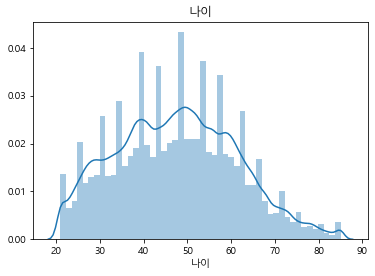

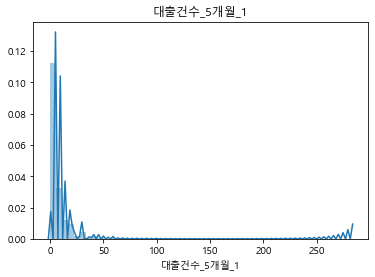

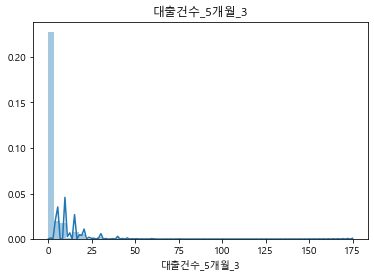

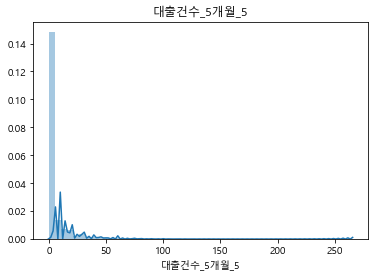

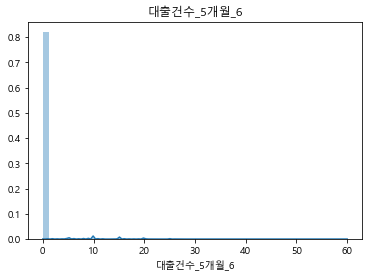

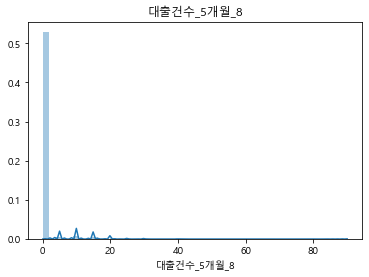

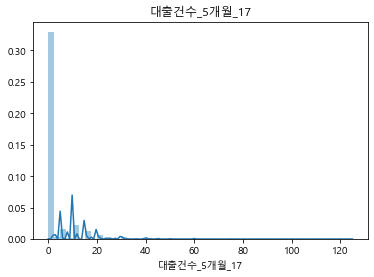

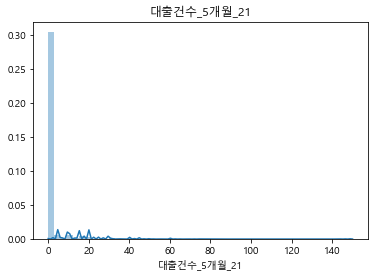

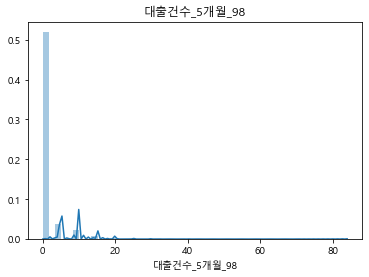

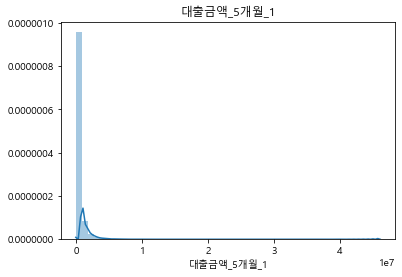

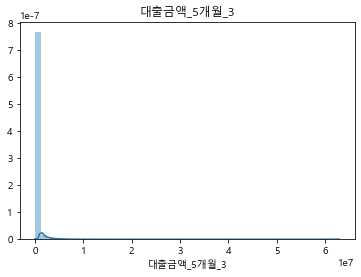

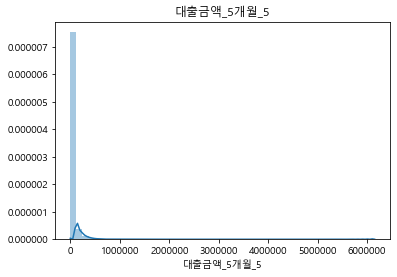

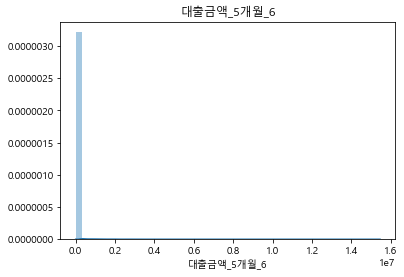

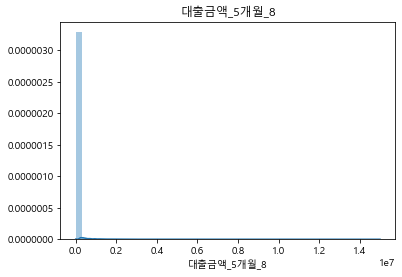

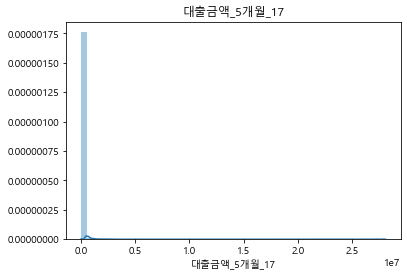

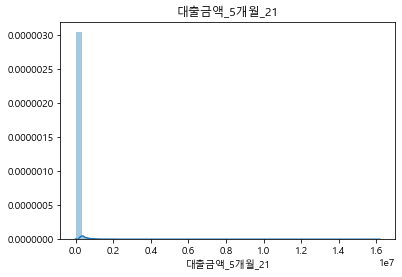

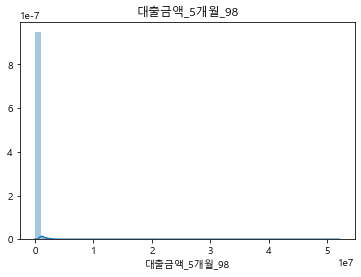

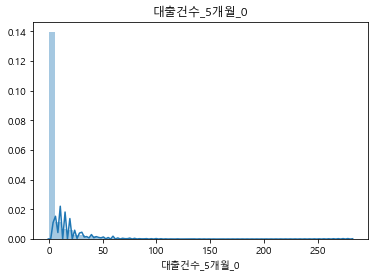

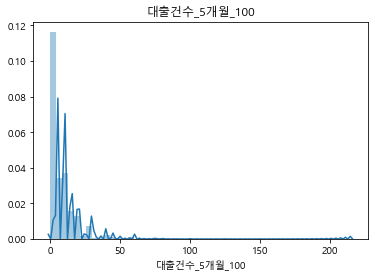

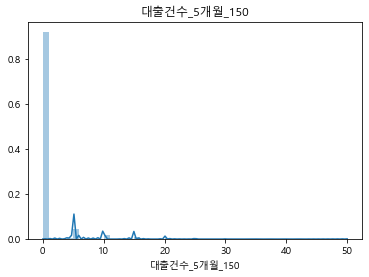

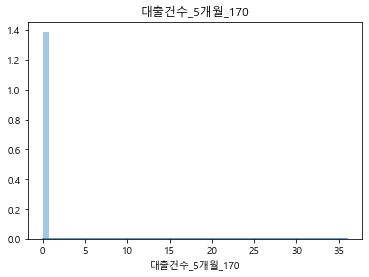

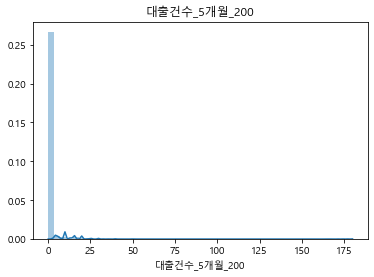

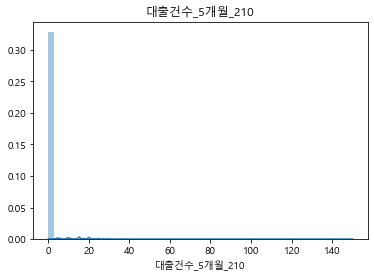

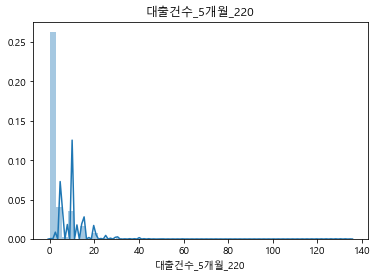

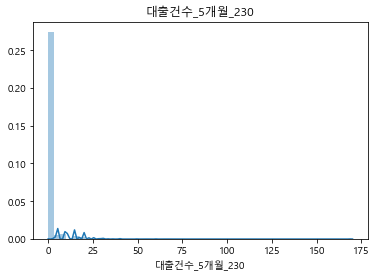

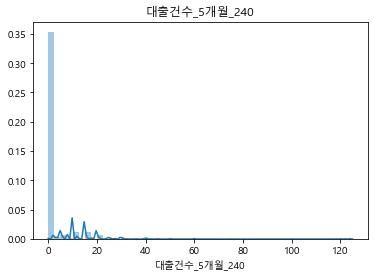

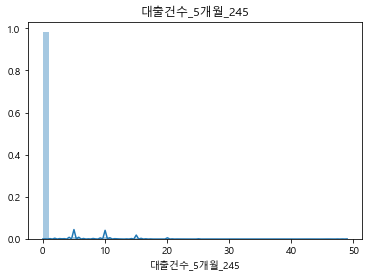

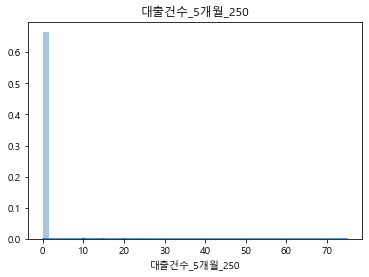

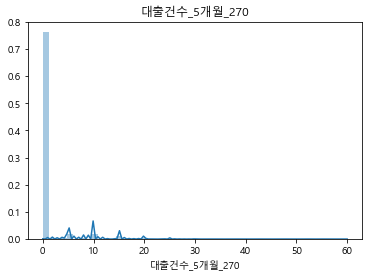

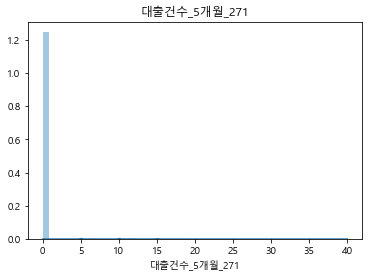

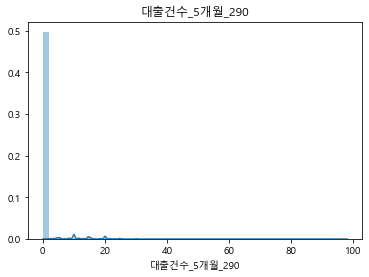

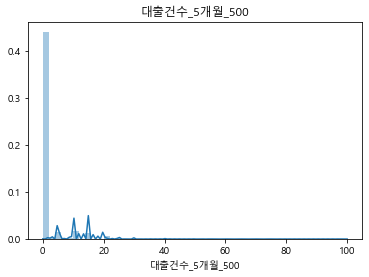

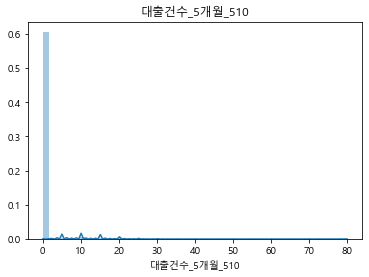

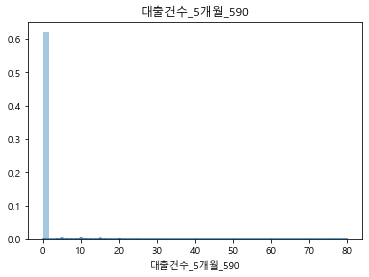

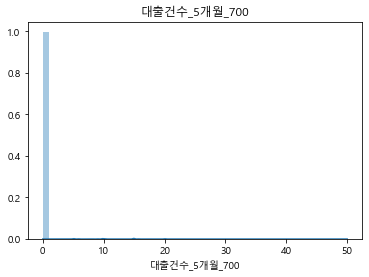

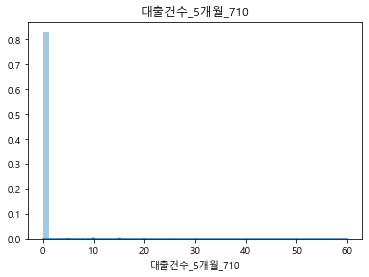

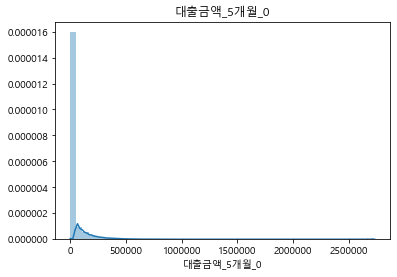

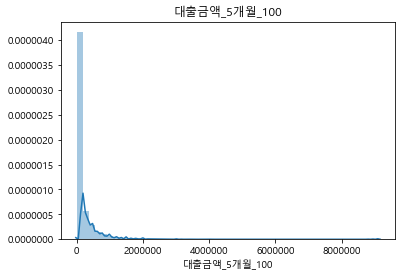

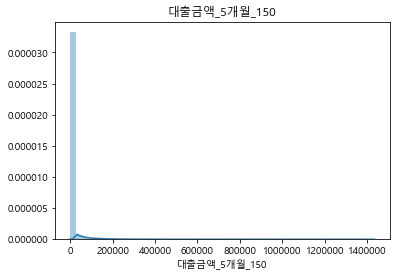

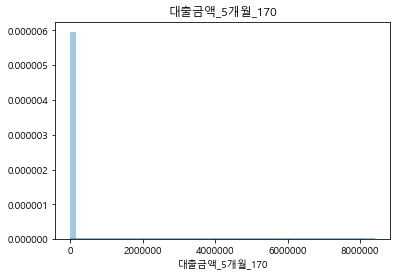

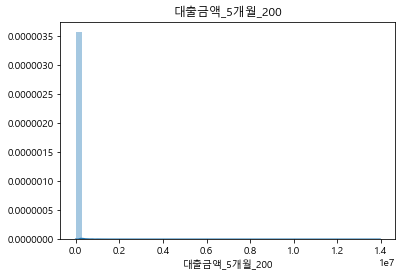

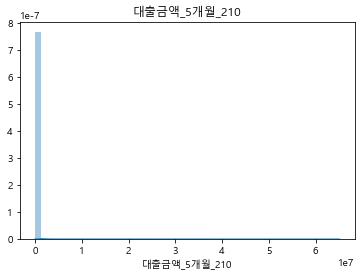

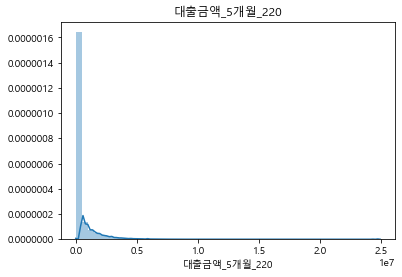

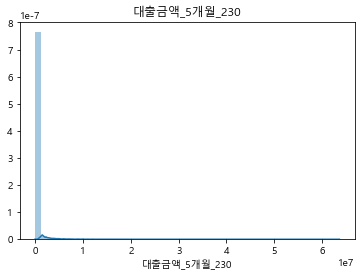

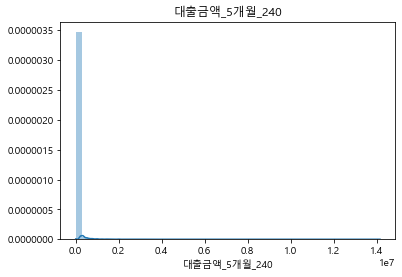

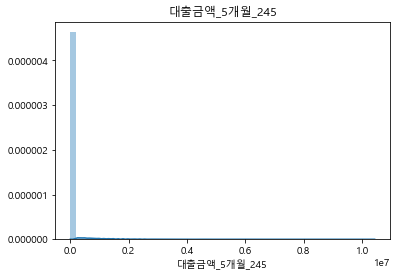

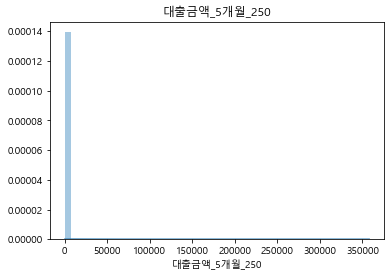

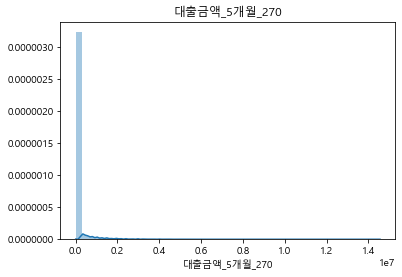

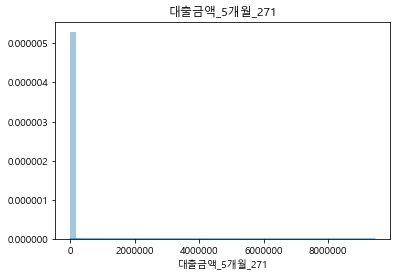

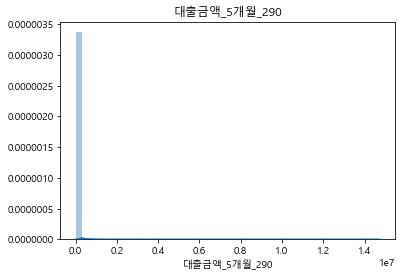

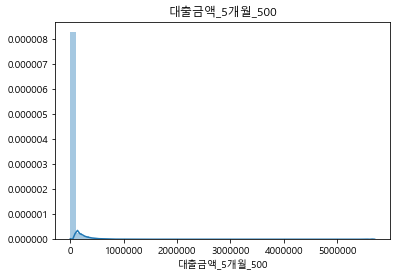

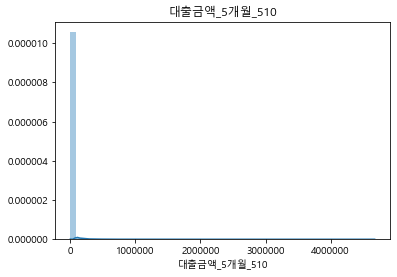

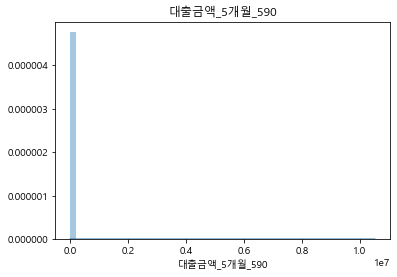

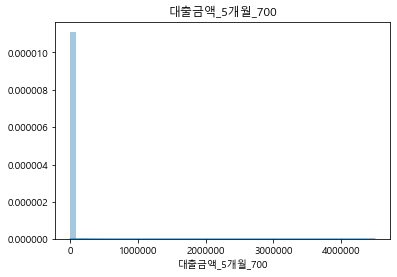

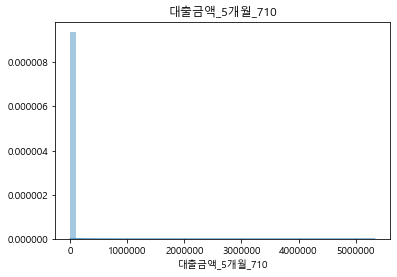

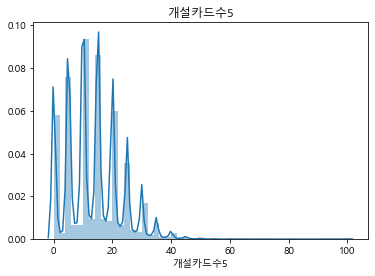

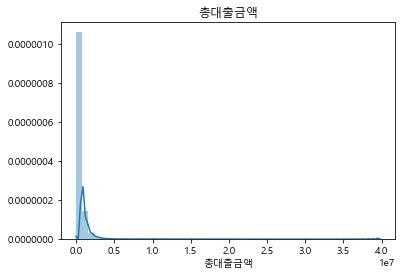

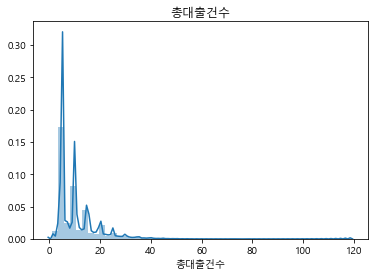

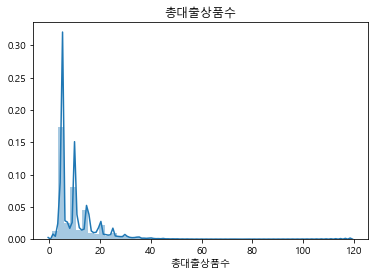

예외발생


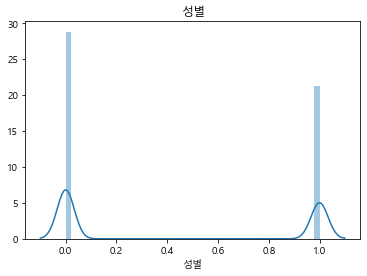

In [63]:
for i in range(1,len(df_m.columns)):
    try:
        sns.distplot(df_m[df_m.columns[i]])
        plt.title(df_m.columns[i])
        plt.show()
    
    except Exception as e:
        print('예외발생')

In [39]:
df_m.columns[1]

' 대출건수_ 01)'

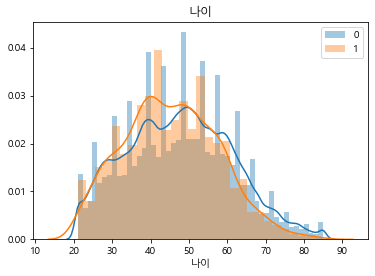

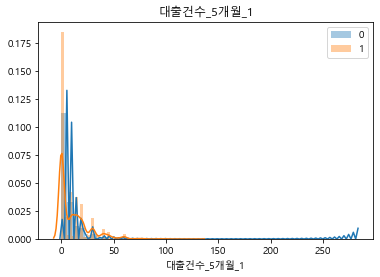

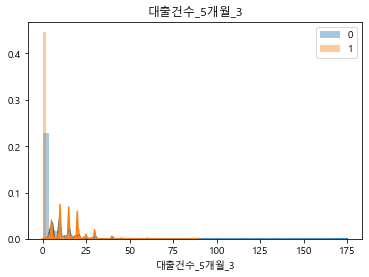

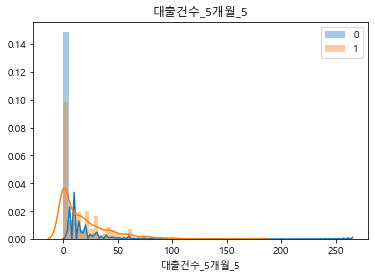

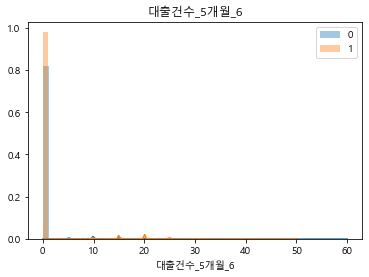

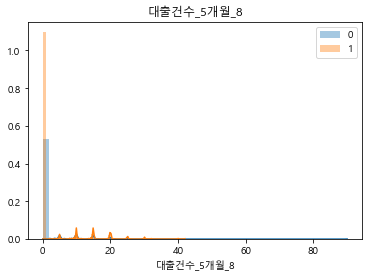

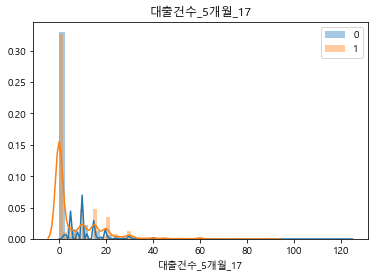

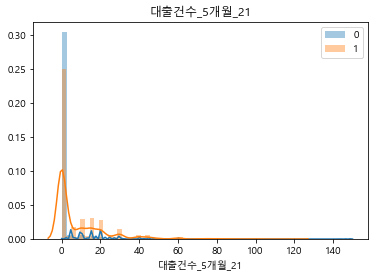

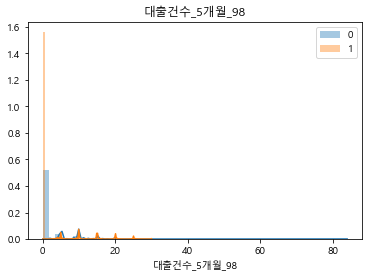

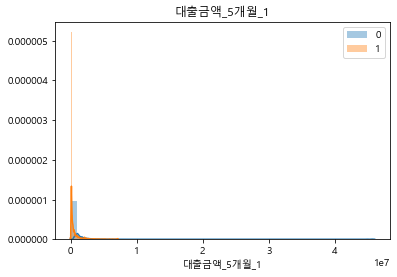

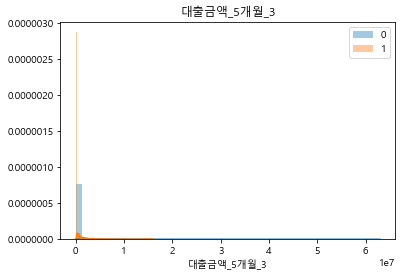

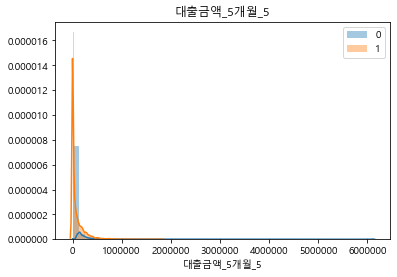

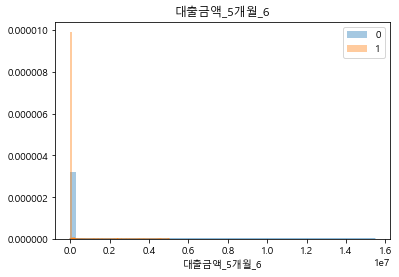

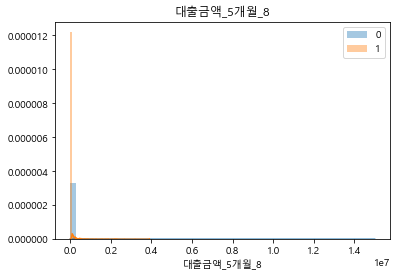

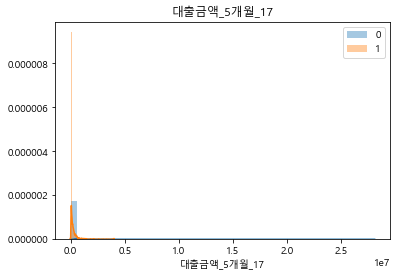

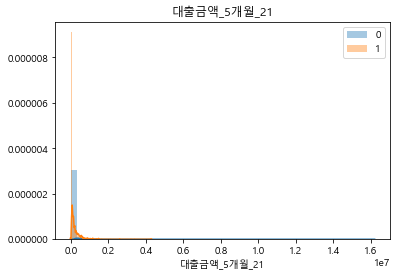

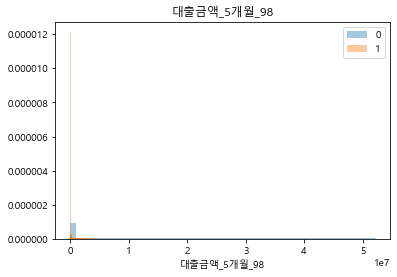

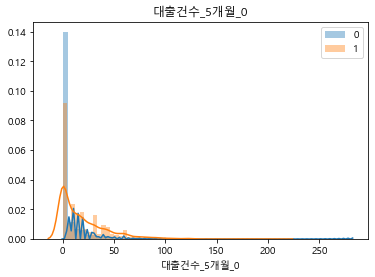

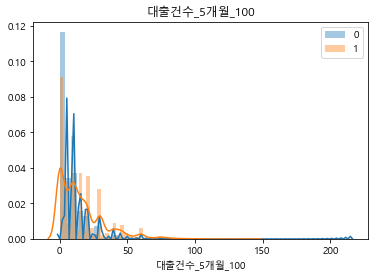

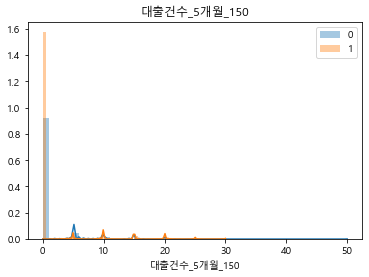

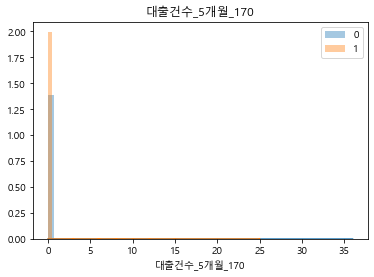

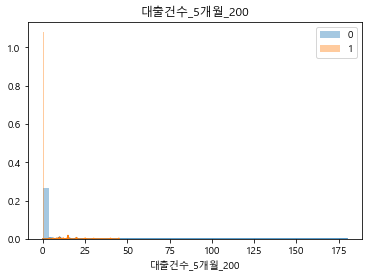

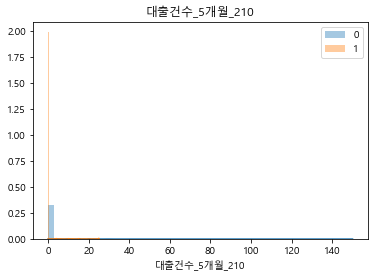

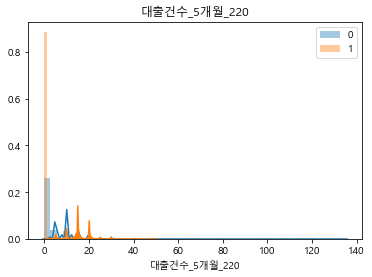

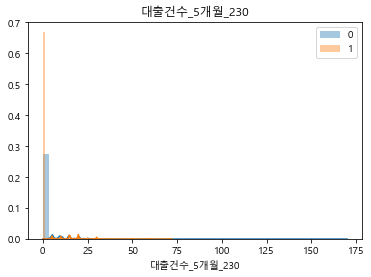

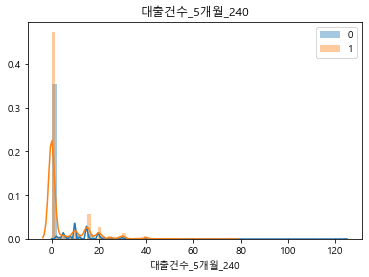

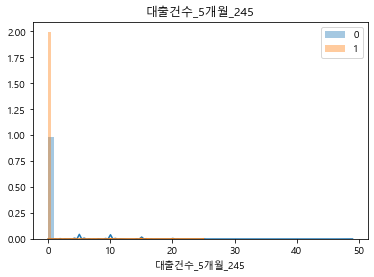

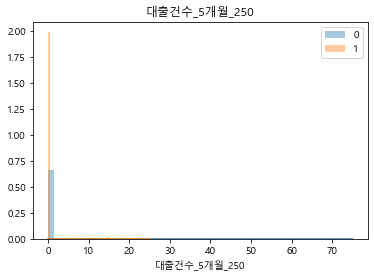

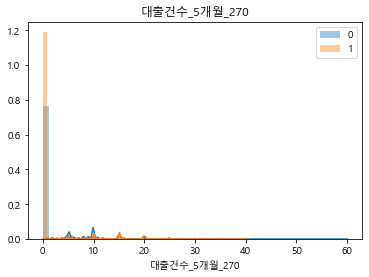

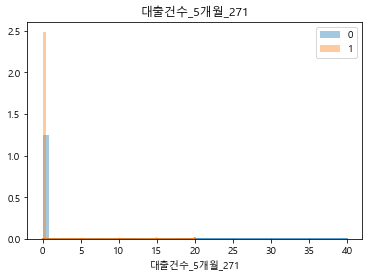

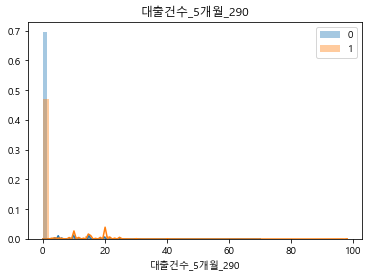

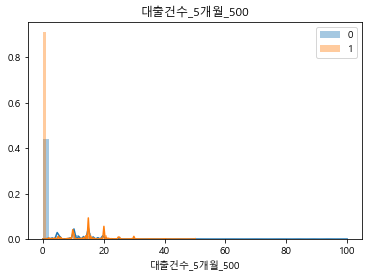

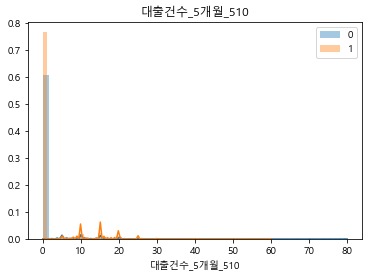

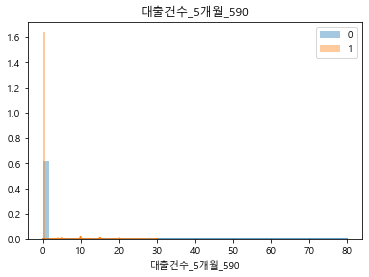

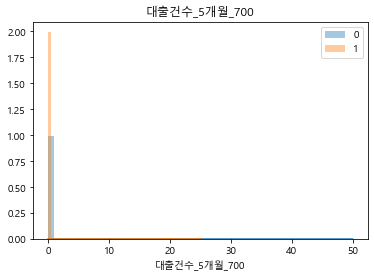

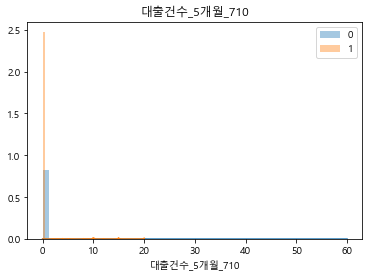

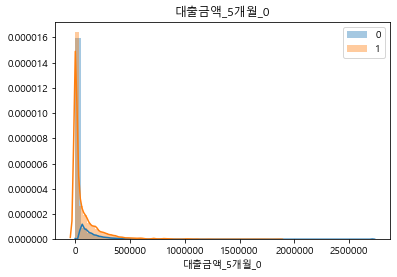

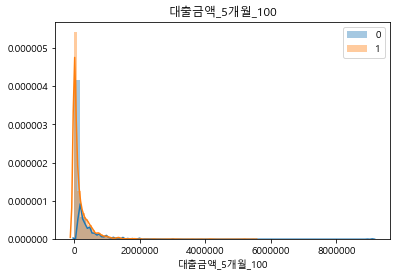

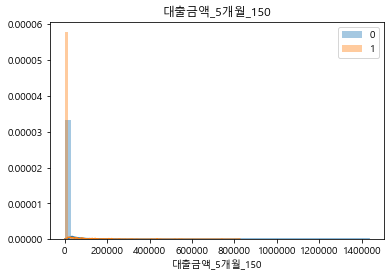

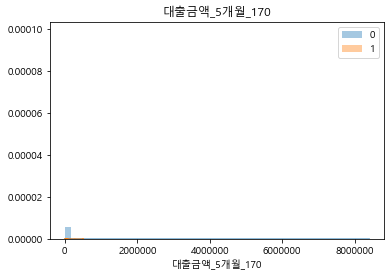

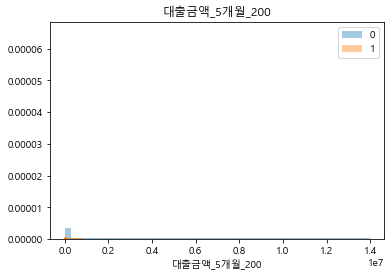

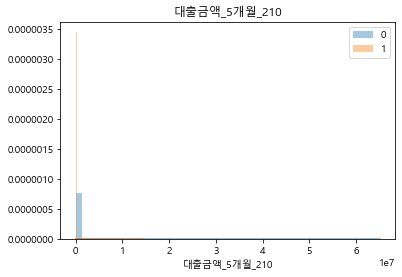

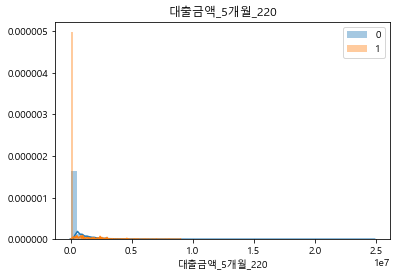

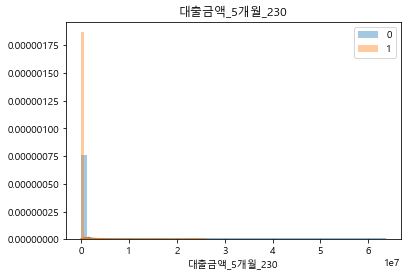

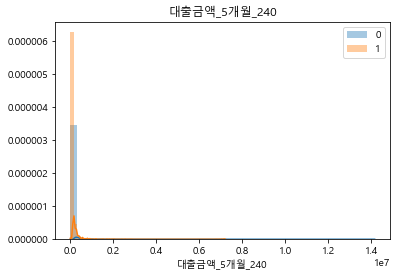

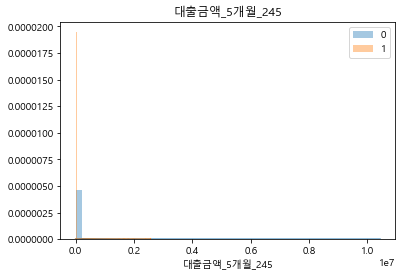

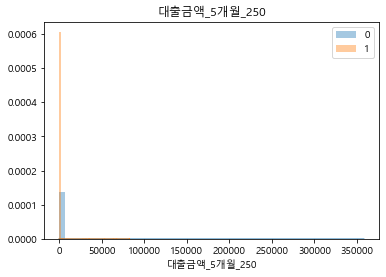

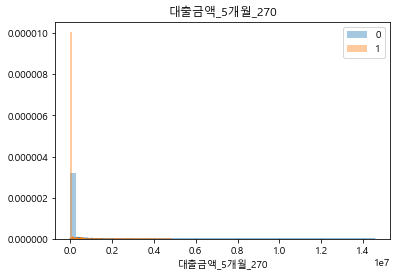

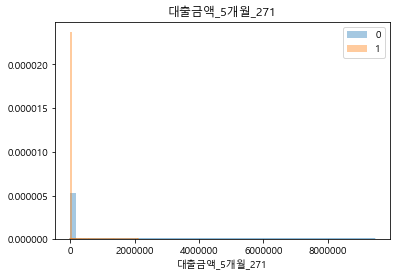

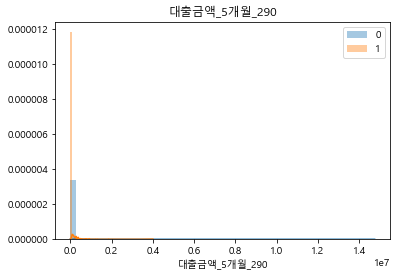

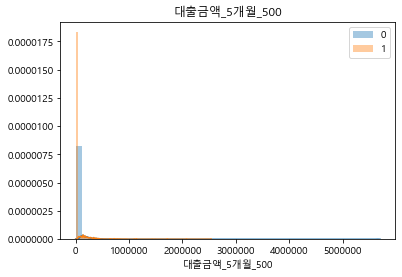

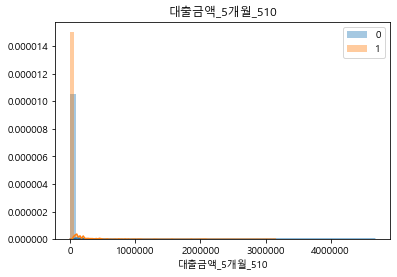

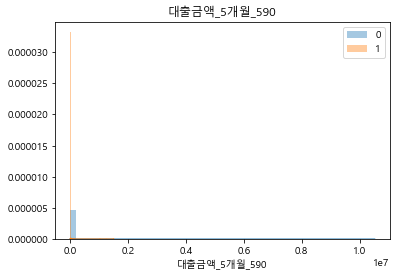

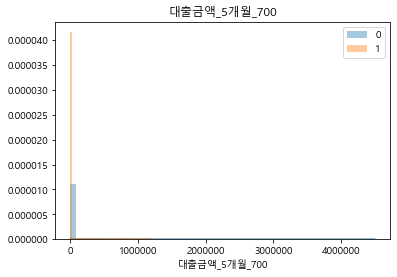

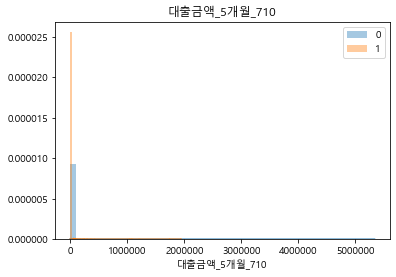

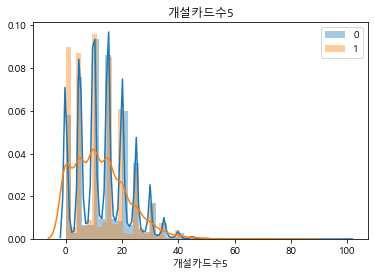

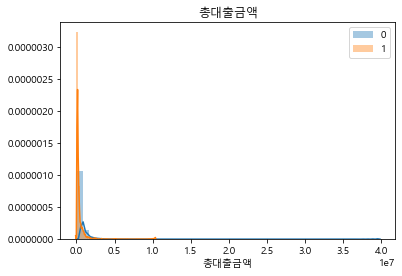

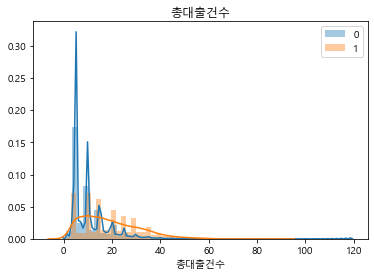

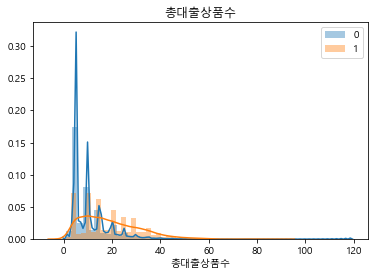

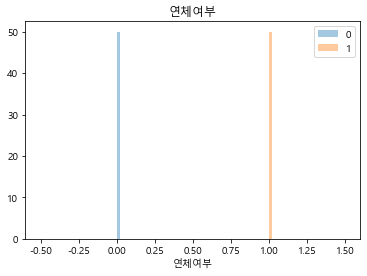

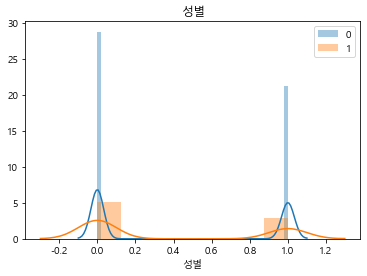

In [35]:
for i in range(1,len(df_m.columns)):
    try:
        g = sns.distplot(df_m.loc[df_m['연체여부'] == 0][df_m.columns[i]], label= 0)
        g = sns.distplot(df_m.loc[df_m['연체여부'] == 1][df_m.columns[i]], label= 1)
        g.legend(loc=1)
        fig = ax.get_figure()
        plt.title(df_m.columns[i])
        plt.show()
        g.figure.savefig('C:/Users/ksy/Desktop/개인/코로나19 팀프로젝트/2.EDA/png/distribution/'+df_m.columns[i]+'.png')
        
    except Exception as e:
        print("예외발생")